### Problem Statement : 
+ Creating Soil moisture prediction model for CYGNSS data attributes using ML algorithms	  

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Important libraries</p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing
import scipy.stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.ensemble import VotingRegressor ,BaggingRegressor, AdaBoostRegressor,GradientBoostingRegressor
from numpy import mean,std
import xgboost as xgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from pprint import pprint
from sklearn import tree

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import Collecting_featured_Data_of_CYGNSS_with_SMAP_SM
import imp
imp.reload(Collecting_featured_Data_of_CYGNSS_with_SMAP_SM)
import Collecting_featured_Data_of_CYGNSS_with_SMAP_SM as FD

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">1. Importing the Dataset</p>

### Yearly data
+ Input: Starting and ending day number
+ Output: Data containing all data points in that period

In [3]:
# Data_Original = FD.Featured_Data_CYGNSS(1,366)

### Monthly Data
+ Input: Month number
+ Output: Data containing all data points in that particular month

In [4]:
Data_Original1 = FD.Monthly_Featured_Data(8) # Month August

### Header information of Data

In [5]:
Data = Data_Original1.copy()
Data.shape

(32646, 11)

In [6]:
Data.head()

,SMAP_Latitude,SMAP_Longitude,SMAP_Incination,ddm_snr,gps_tx_power_db_w,gps_ant_gain_db_i,SMAP_SP_RX_Gain,rx_to_sp_range,tx_to_sp_range,DDM_Peak,SMAP_SM
0,30.966091,73.008300,32.534944,9.569815,16.350543,15.684829,8.507338,621506.605295,2.085301e+07,5.580034e-17,0.229794
1,30.966091,73.381744,46.102681,6.450545,16.353704,16.609209,-2.264461,719683.932236,2.170806e+07,2.996239e-17,0.278490
2,30.966091,73.755190,44.024018,-11.135013,16.132194,16.285606,-17.741603,742242.759811,2.206175e+07,-3.167632e-16,0.322291
3,30.966091,74.128630,39.629601,-7.216905,15.631957,16.005097,-14.035985,709846.025058,2.182126e+07,1.770377e-16,0.327379
4,30.966091,74.502075,34.059116,11.630496,15.154190,15.844456,2.088485,644579.174351,2.119202e+07,1.116436e-15,0.412700


+ This is structured data as it is in the form of tabular format

### Counts of non-null data and their types within the attributes

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32646 entries, 0 to 878
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMAP_Latitude      32646 non-null  float64
 1   SMAP_Longitude     32646 non-null  float64
 2   SMAP_Incination    32646 non-null  float64
 3   ddm_snr            32646 non-null  float64
 4   gps_tx_power_db_w  32646 non-null  float64
 5   gps_ant_gain_db_i  32646 non-null  float64
 6   SMAP_SP_RX_Gain    32646 non-null  float64
 7   rx_to_sp_range     32646 non-null  float64
 8   tx_to_sp_range     32646 non-null  float64
 9   DDM_Peak           32646 non-null  float64
 10  SMAP_SM            32646 non-null  float64
dtypes: float64(11)
memory usage: 3.0 MB


### Target Variable of the data

In [8]:
attributes = Data.keys()
attributes[-1]

'SMAP_SM'

### Attributes of the data

In [9]:
attributes[:-1]

Index(['SMAP_Latitude', 'SMAP_Longitude', 'SMAP_Incination', 'ddm_snr',
       'gps_tx_power_db_w', 'gps_ant_gain_db_i', 'SMAP_SP_RX_Gain',
       'rx_to_sp_range', 'tx_to_sp_range', 'DDM_Peak'],
      dtype='object')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. Data Cleaning</p>

### (a) Removing duplicated values

+ This can create redundancy in the data
+ Checking and removing duplicate Values

In [10]:
Data.duplicated().sum()

585

In [11]:
Data = Data.drop_duplicates()
Data.duplicated().sum()

0

### (b) Dealing with Missing Data

In [12]:
Data.isna().sum().sum()

0

+ Fortunately there are no missing values present in the data

## (c). Visualization of the data

#### Measuring Central Tendency of the data

In [13]:
Data.describe()

,SMAP_Latitude,SMAP_Longitude,SMAP_Incination,ddm_snr,gps_tx_power_db_w,gps_ant_gain_db_i,SMAP_SP_RX_Gain,rx_to_sp_range,tx_to_sp_range,DDM_Peak,SMAP_SM
count,32061.000000,32061.000000,32061.000000,32061.000000,32061.000000,32061.000000,32061.000000,3.206100e+04,3.206100e+04,3.206100e+04,32061.000000
mean,26.128511,81.113213,39.342788,7.454554,15.663623,15.539727,4.109511,7.161757e+05,2.151894e+07,1.329206e-16,0.329341
std,2.890346,4.615313,52.463535,14.986857,3.177359,2.493482,20.792132,5.768100e+05,3.057096e+06,6.961885e-16,0.122789
min,21.229897,73.008300,-1872.526684,-368.318633,-77.468977,-56.824957,-380.788610,-3.361722e+07,-8.950369e+07,-1.837626e-14,0.020000
25%,23.670140,77.116180,23.889980,0.947176,14.739315,14.734245,-0.869190,5.615514e+05,2.060515e+07,1.048948e-18,0.229721
50%,26.155790,81.224070,39.209433,5.821002,15.822773,15.466664,5.224069,6.759047e+05,2.141594e+07,2.139728e-17,0.359089
75%,28.694414,84.958500,55.421166,12.756873,16.625770,16.389389,9.549991,8.658185e+05,2.243674e+07,1.592214e-16,0.433802
max,30.966091,88.692950,2070.998578,869.490197,211.205692,144.898486,1080.014306,2.349003e+07,1.519430e+08,3.527553e-14,0.573872


### Histogram Plot

In [14]:
def Skewness(Skw):
    if Skw>0:
        return "Positively Skewed"
    else:
        return "Negatively Skewed"
    
def Histogramplot(attribute,dataset):
    for i in range(len(attribute)):
        var = str(attribute[i])
        plt.figure(figsize=(20,5),dpi=100)
        plt.subplot(1,2,1)
        sns.distplot(dataset[f'{var}'])
        Skw = (skew(dataset[f'{var}'], axis=0, bias=True))
        plt.subplot(1,2,2)
        sns.violinplot(dataset[f'{var}'])
        plt.title(f'''Histogram plot of {var} with 
        skewness : {np.round(Skw,2)}, {Skewness(Skw)}''')

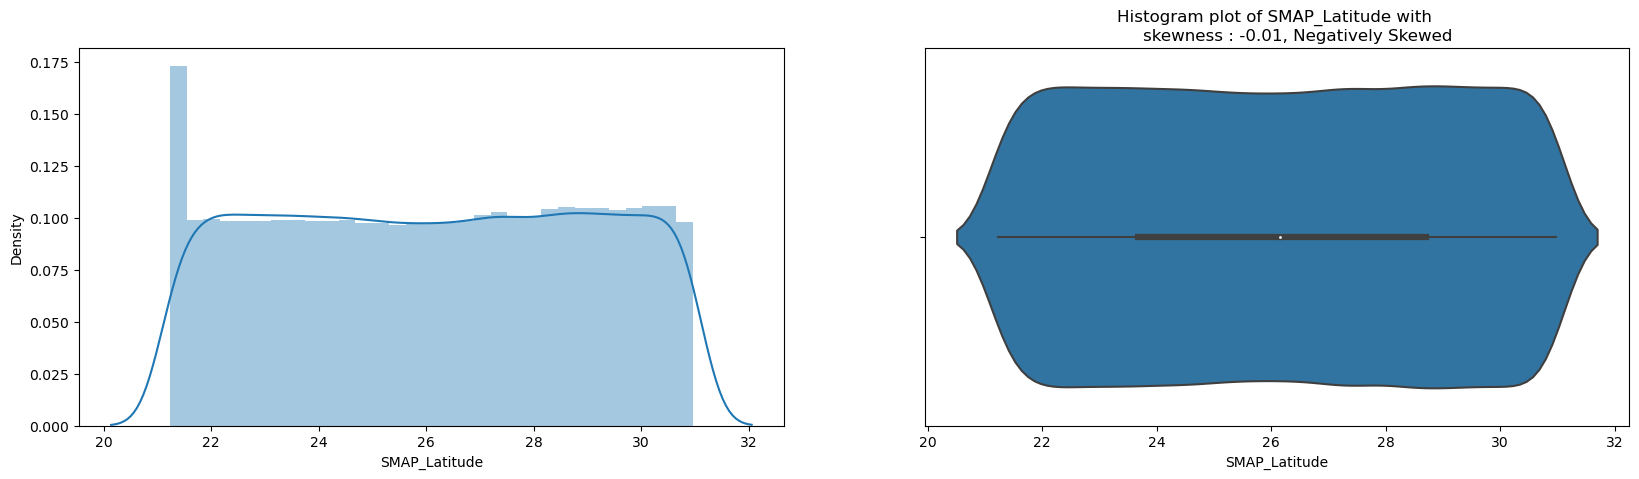

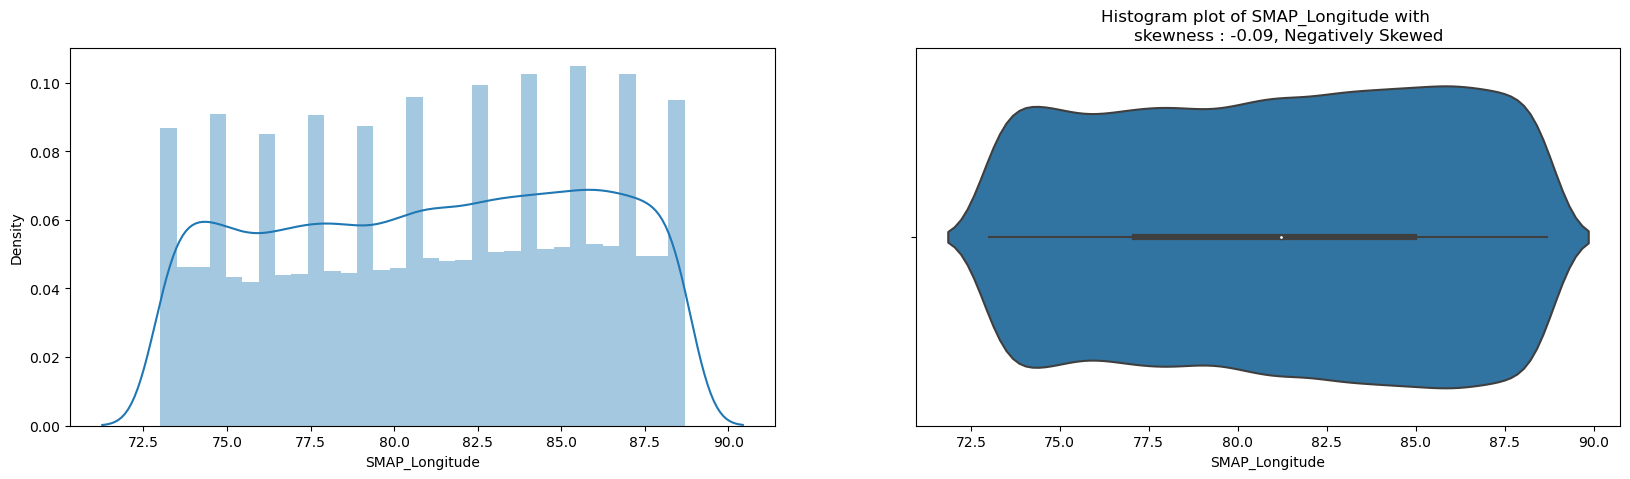

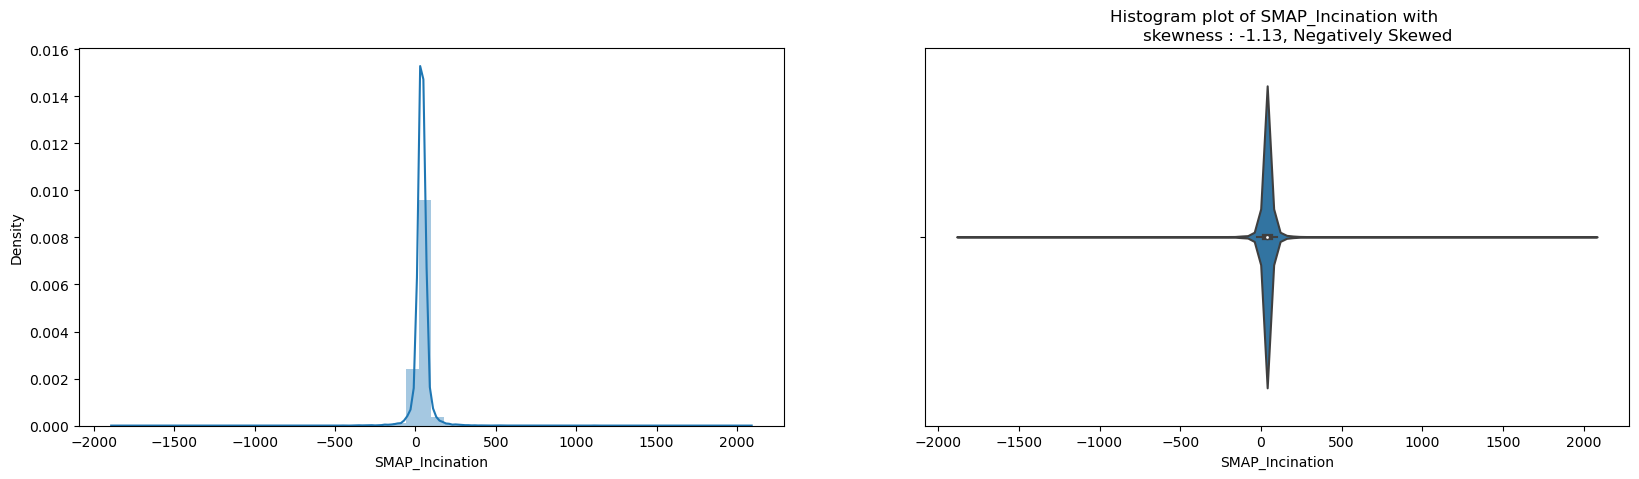

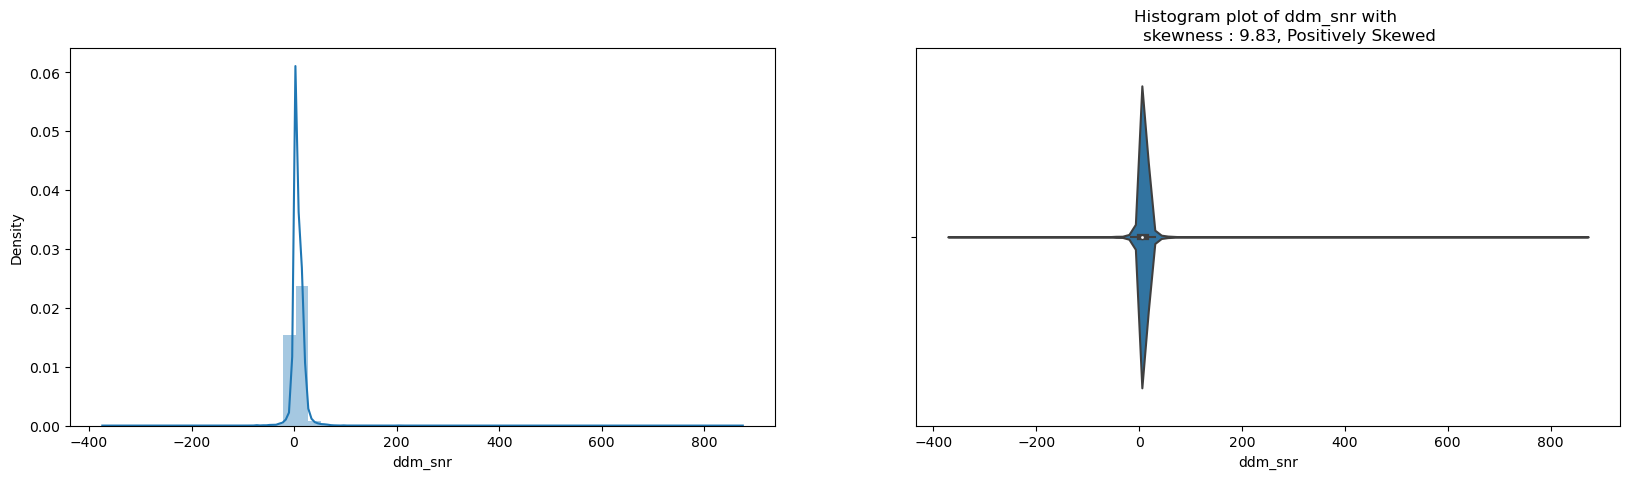

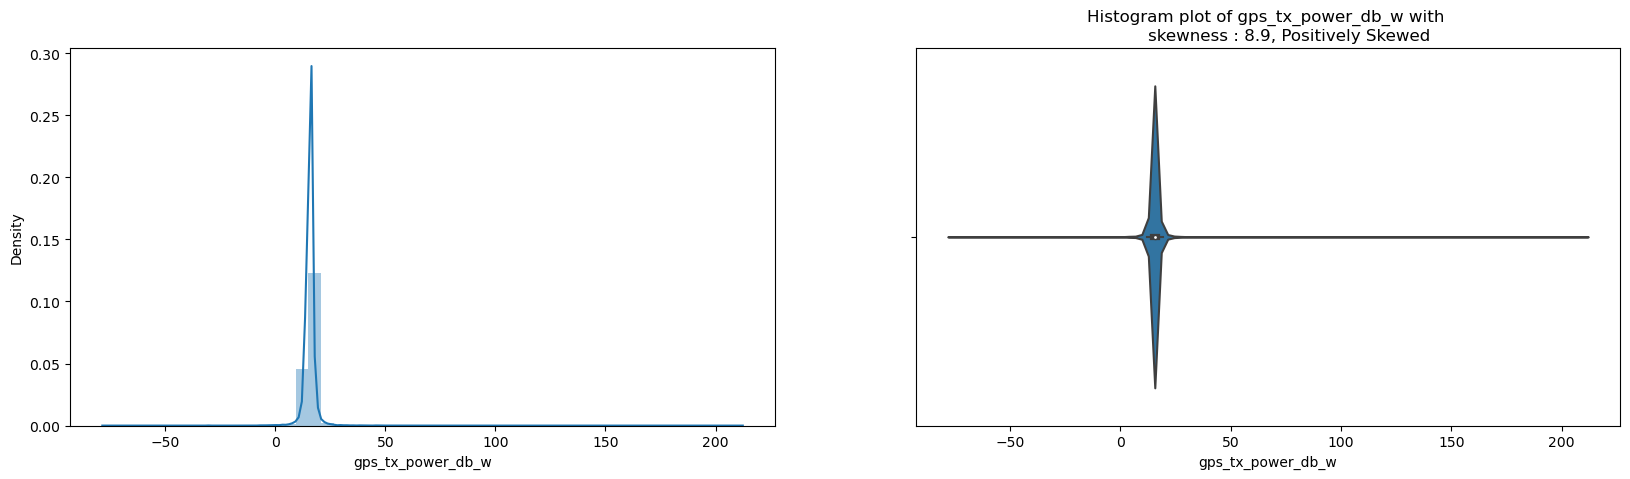

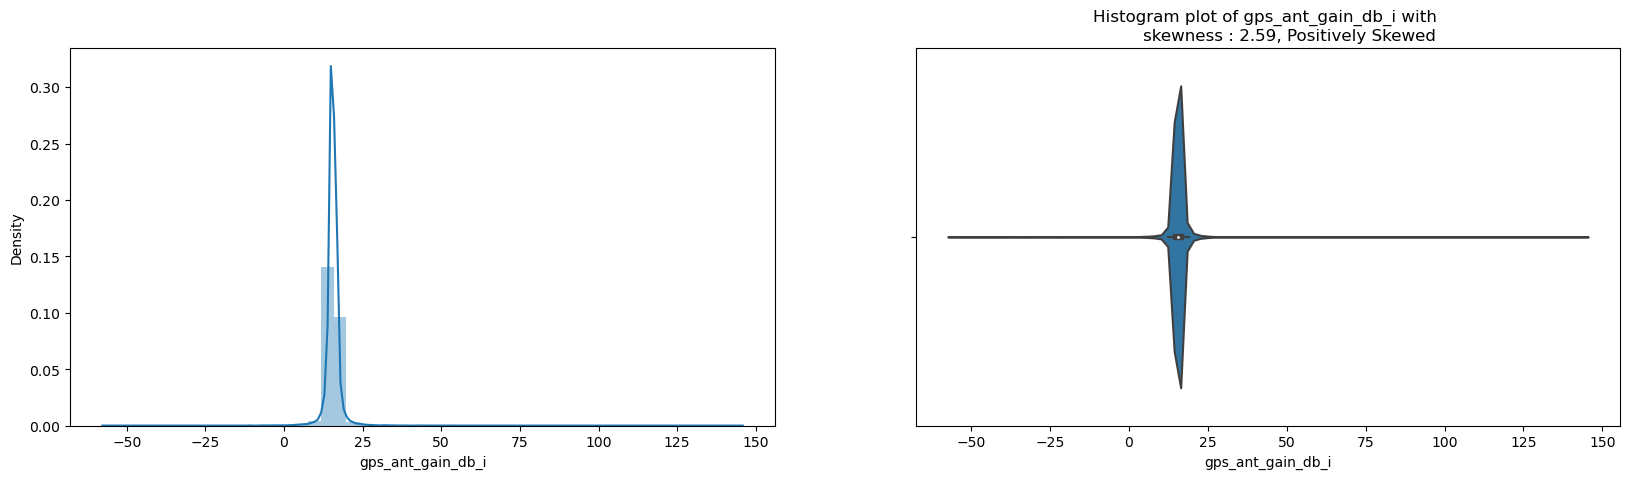

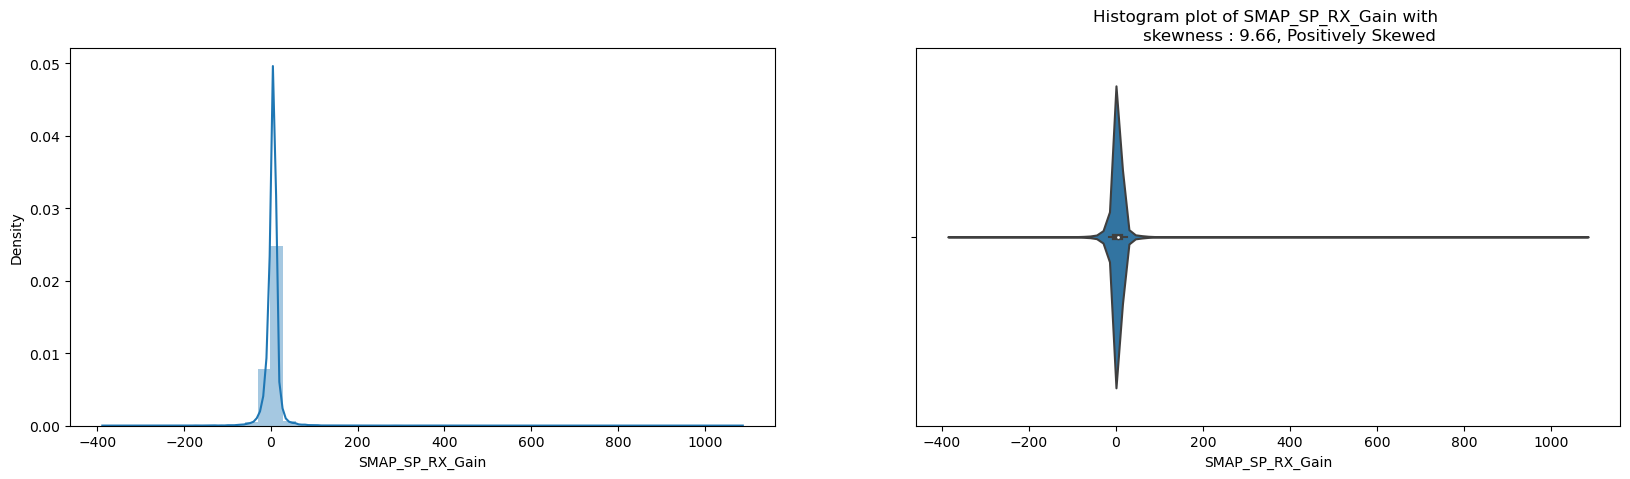

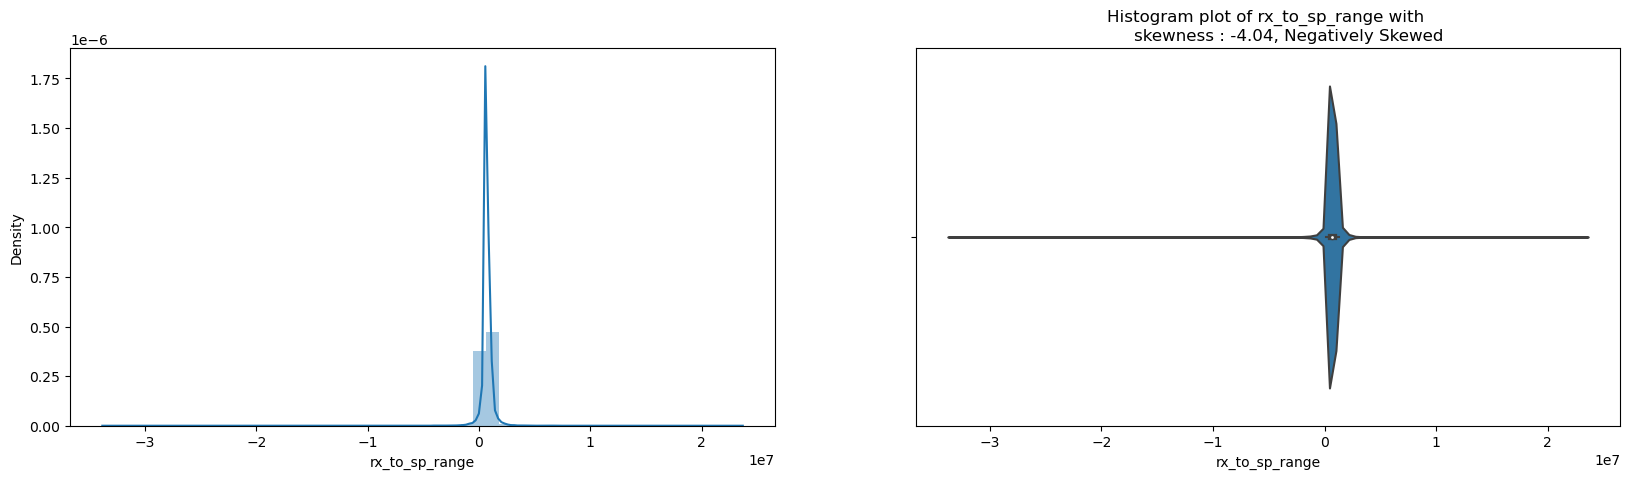

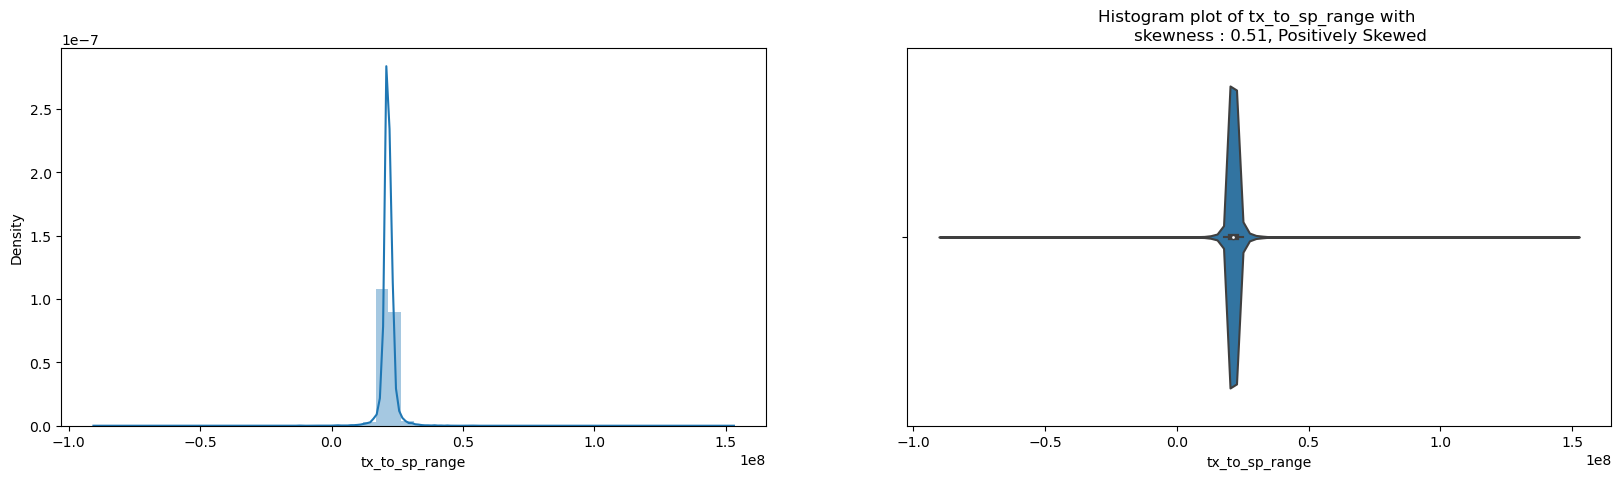

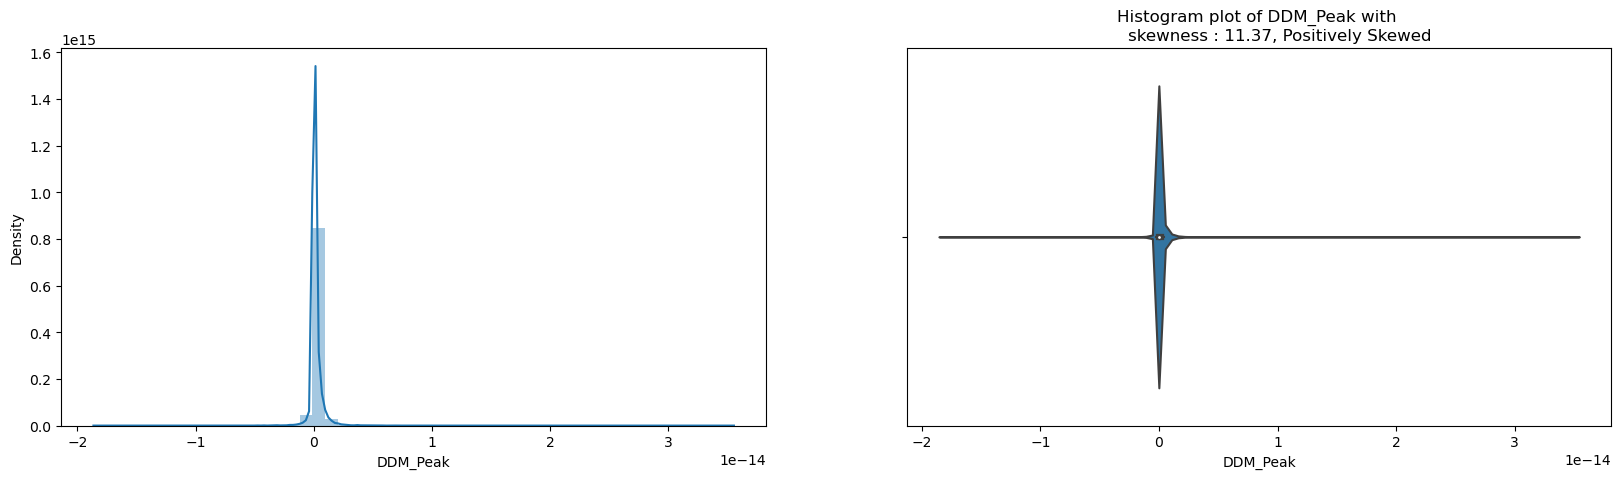

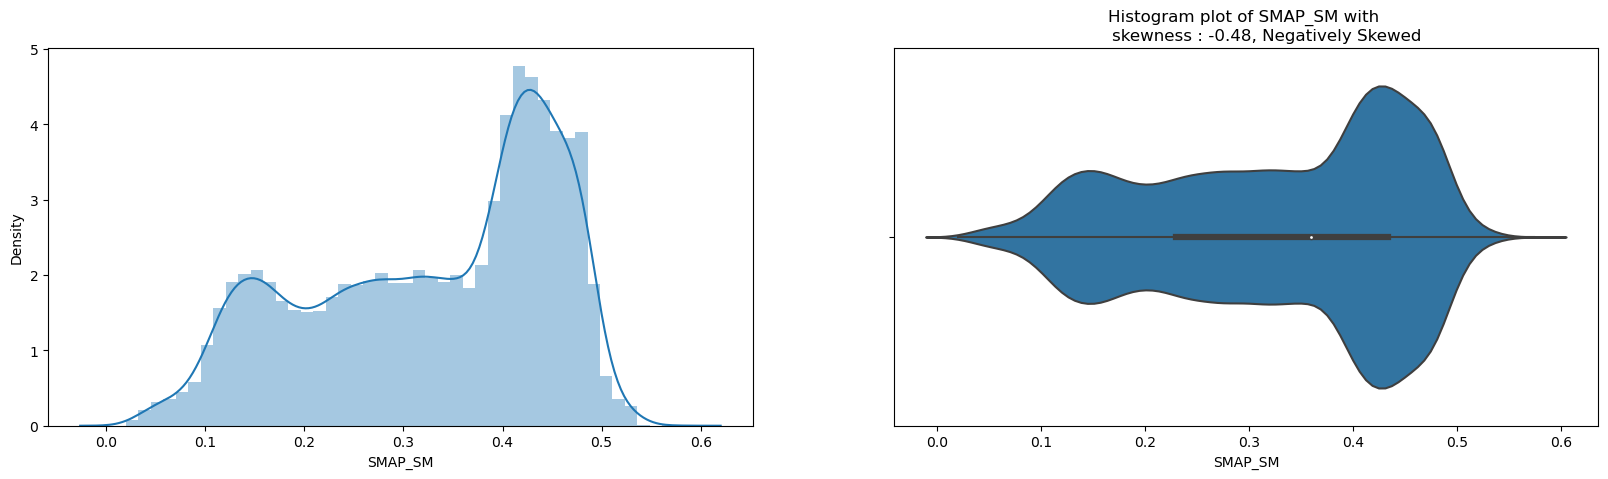

In [15]:
Histogramplot(attributes,Data)

## (d) Outlier detection and its removal
### Why we are removing the outliers ?
+ Our model will try to learn outliers ( not following the general trend of the data ) data also and will result in junk model

## Method 1: Box-Plot

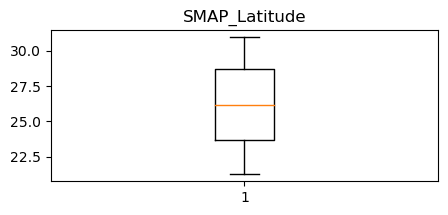

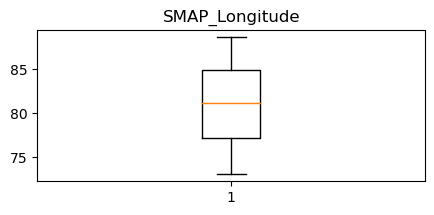

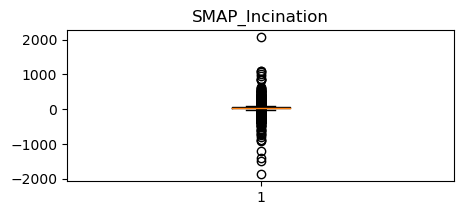

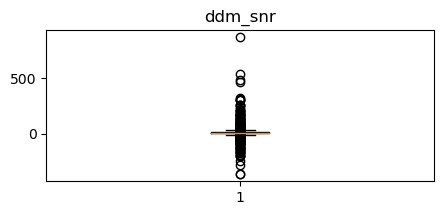

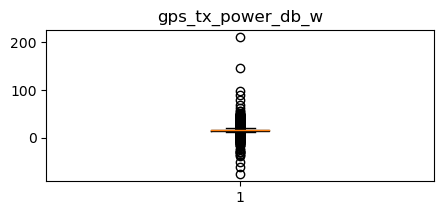

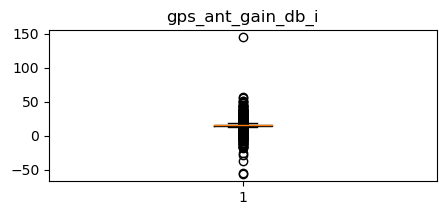

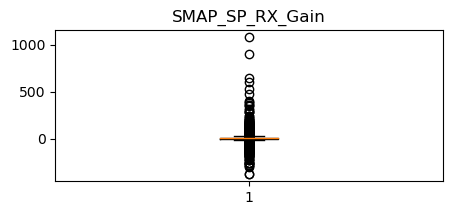

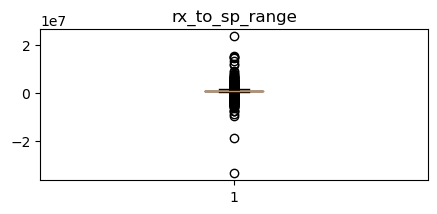

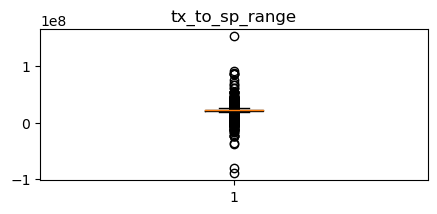

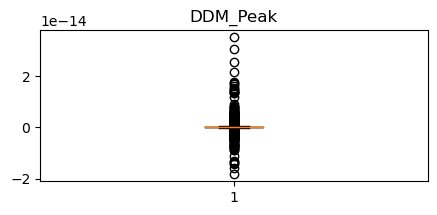

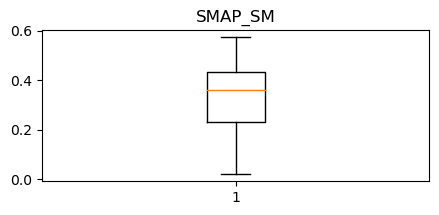

In [16]:
for i in range(len(attributes)):
    col = attributes[i]
    plt.figure(figsize=(5,2),dpi=100)
    plt.boxplot(Data[col]) 
    plt.title(col)

+ We need to remove or replace the outliers 
+ Since data points are huge so we will drop the outliers

### Removing outliers by droping the corresponding rows

In [17]:
# Function to remove outlier in a single variable

def Outlier_Removal(Data,var):
    Q1 = np.percentile(Data[f'{var}'], 25,interpolation = 'midpoint')
    Q3 = np.percentile(Data[f'{var}'], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    
    # Removing the Outliers
    mask = (Data[f'{var}']<=upper) & (Data[f'{var}']>=lower)
    Data = Data[mask]
    return Data

# Function to give updated data after removing outlier in a single attribute
def Final_Data(Data,var):
    ds = Data
    ds  = Outlier_Removal(ds,var)
    return ds

In [18]:
# Final updated data after removing outlier in all the attributes
Cleaned_Data = Data.copy()
for j in range(1):
    for i in range(len(attributes)):
        var = attributes[i]
        Cleaned_Data  = Final_Data(Cleaned_Data,var) 
    Final_Data1 = Cleaned_Data.reset_index()
    Final_Data1 = Final_Data1.drop(['index'],axis = 1)
    Cleaned_Data = Final_Data1

**Re-visualization of the data using Box-plots after outlier removal**

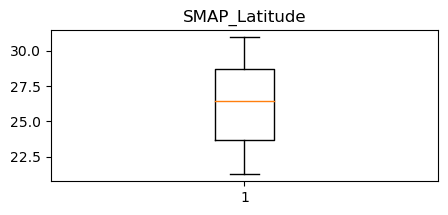

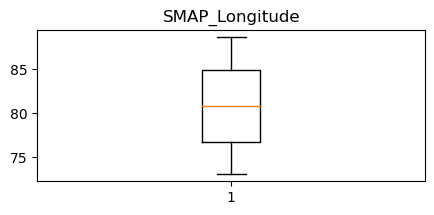

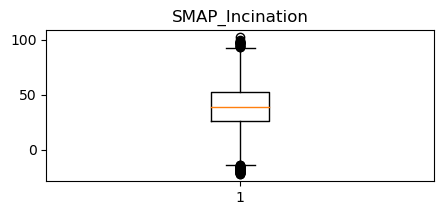

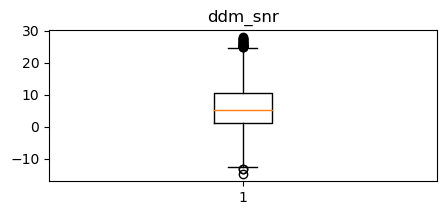

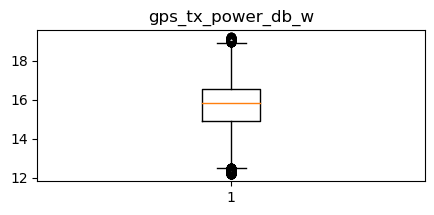

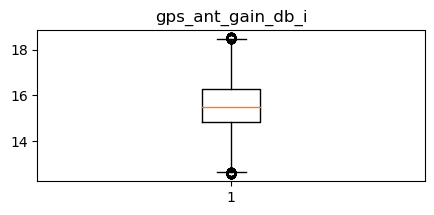

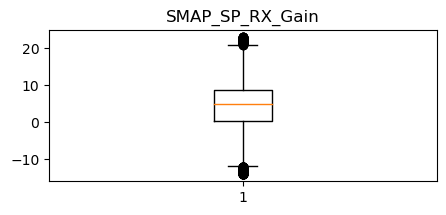

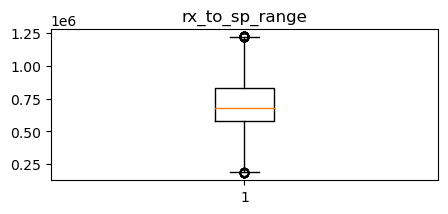

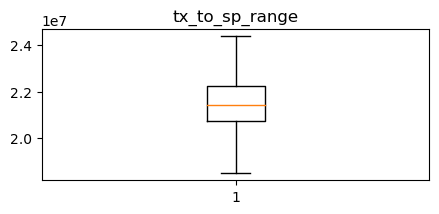

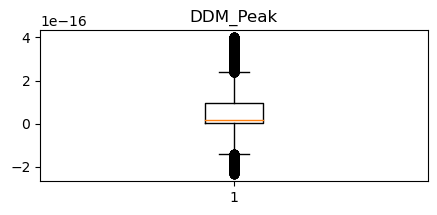

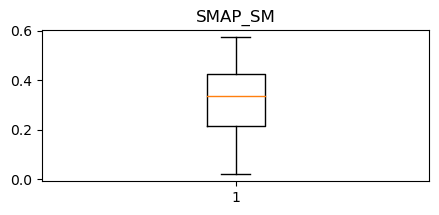

In [19]:
for i in range(len(attributes)):
    col = attributes[i]
    plt.figure(figsize=(5,2),dpi=100)
    plt.boxplot(Final_Data1[col]) 
    plt.title(col)

In [20]:
Data = Final_Data1
Data.shape

(22094, 11)

## Method 2: Using Clustering

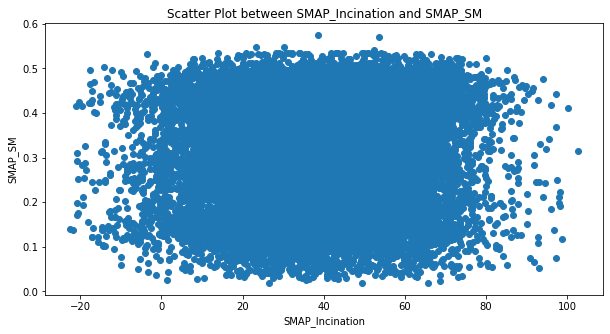

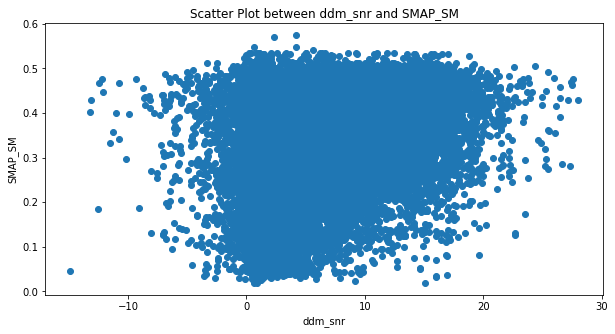

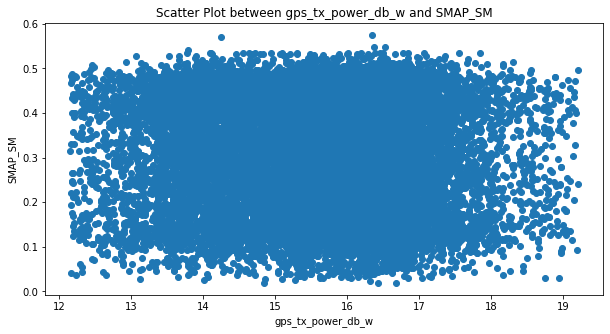

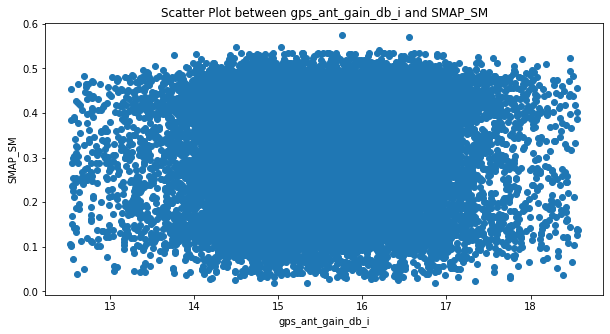

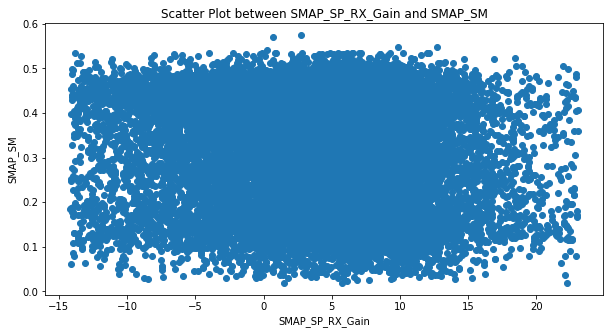

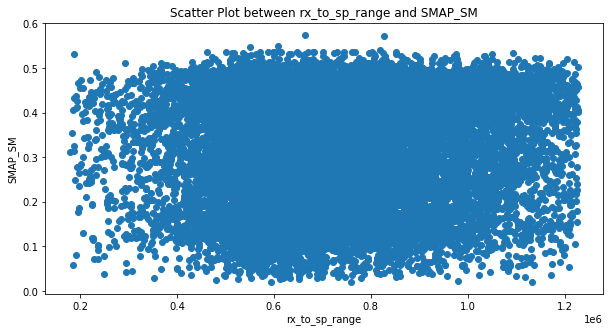

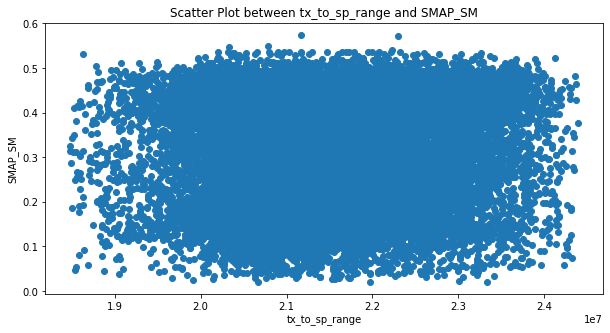

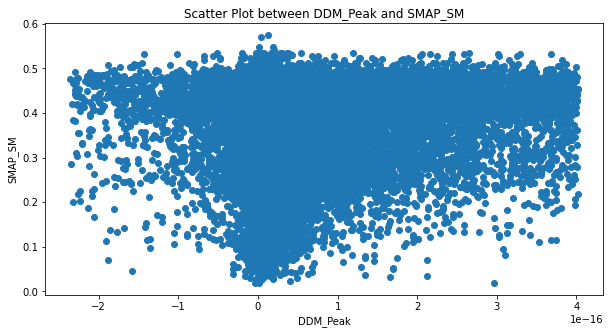

In [21]:
for i in range(len(attributes)-3):
    X  = attributes[i+2]
    Y  = attributes[-1]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(Data[X],Data[Y]) 
    ax.set_xlabel(f'{X}')
    ax.set_ylabel(f'{Y}')
    ax.set_title(f'Scatter Plot between {X} and {Y}')

From scatter plot we can see that only one group is formed so there is no outliers
Now : 
+ Data is not having any attributes with noisy values
+ Data is consistent as all the attributes are having their importance and they are unique and important for the prediction of SM
+ There is no intentional data

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. Data Reduction</p>

## Method 1 : By correlation
+ Remove the most correlated data attributes
+ Correlation using Pearson Coefficient

<AxesSubplot:>

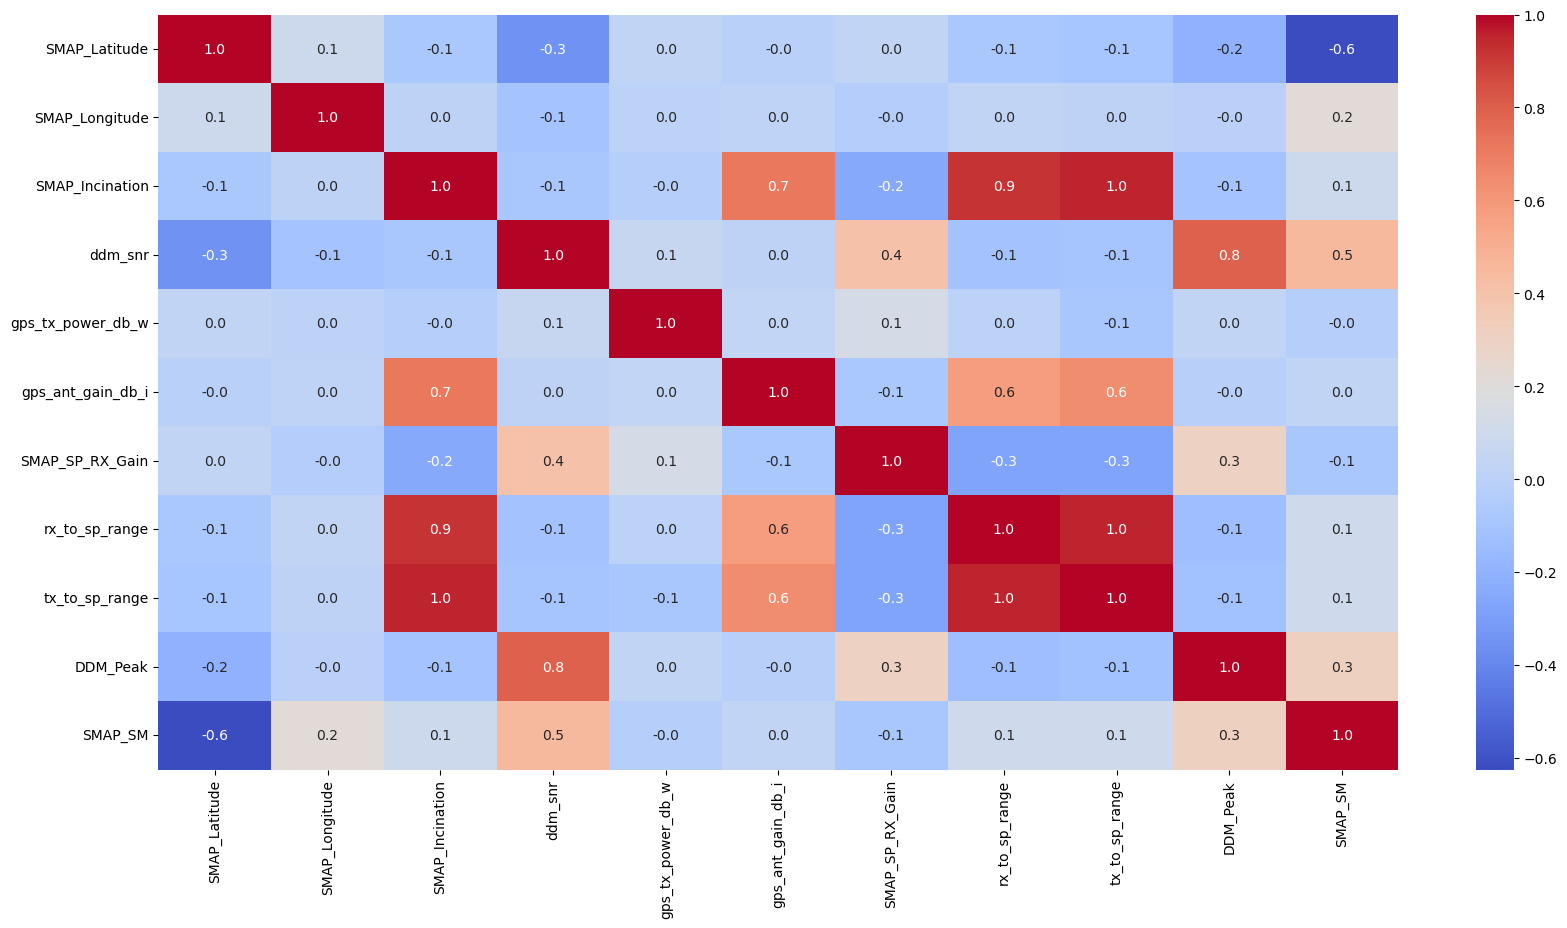

In [22]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(Data.corr(),cmap='coolwarm',fmt=".1f",annot=True)

### Identifying the redundant attributes in the dataset using Pearson correlation coefficient

In [23]:
from scipy.stats import pearsonr
for i in range(len(attributes)):
    for j in range(len(attributes)):
        corr, _ = pearsonr(Data[attributes[i]], Data[attributes[j]])
        if i!=j:
            if corr>=0.80:
                print(f'Pearsons correlation between {attributes[i]} and {attributes[j]}: %.3f' % corr)

Pearsons correlation between SMAP_Incination and rx_to_sp_range: 0.920
Pearsons correlation between SMAP_Incination and tx_to_sp_range: 0.951
Pearsons correlation between rx_to_sp_range and SMAP_Incination: 0.920
Pearsons correlation between rx_to_sp_range and tx_to_sp_range: 0.954
Pearsons correlation between tx_to_sp_range and SMAP_Incination: 0.951
Pearsons correlation between tx_to_sp_range and rx_to_sp_range: 0.954


+ Here we can see that sp_inc_angle and rx_to_sp_range shows more than 95% similarity with other attributes so we can remove these.

In [24]:
Data.drop('SMAP_Incination', axis=1, inplace=True)
Data.drop('rx_to_sp_range', axis=1, inplace=True)
Data.keys()

Index(['SMAP_Latitude', 'SMAP_Longitude', 'ddm_snr', 'gps_tx_power_db_w',
       'gps_ant_gain_db_i', 'SMAP_SP_RX_Gain', 'tx_to_sp_range', 'DDM_Peak',
       'SMAP_SM'],
      dtype='object')

+ Now total 8 features are left

### Method 2 : Dimensionality or attribute reduction by PCA

Why we need to perform the dimensionality reduction on the selected features before putting them through the ML algorithm.  
+ In this Classification problem, there are many attributes on the basis of which the final classification will be done. 
+ The more will be the number of features, the algorithm  will take more time to run with it. 
+ Many of these features are correlated, and hence redundant. 

Dimensionality reduction is the process of reducing the number of random attributes under consideration, by obtaining a set of principal variables.
+ Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.
+ Here, I will be reducing the dimensions to 3.

#### Sufficient requirement for PCA :
+ Minimum number of attributes should be 2
+ Data type should be numeric since we require feature scaling before applying PCA on the raw data

In [25]:
# Step I : Feature Scaling ( Transforming the data values of all the attributes on single scale )
scaler = StandardScaler()
scaler.fit(Data)
scaled_ds = pd.DataFrame(scaler.transform(Data),columns= Data.columns )
scaled_ds

,SMAP_Latitude,SMAP_Longitude,ddm_snr,gps_tx_power_db_w,gps_ant_gain_db_i,SMAP_SP_RX_Gain,tx_to_sp_range,DDM_Peak,SMAP_SM
0,1.600209,-1.709401,0.590872,0.568812,0.142871,0.662799,-0.611700,-0.041024,-0.718127
1,1.600209,-1.628077,0.033639,0.571406,1.075208,-1.004330,0.193729,-0.288696,-0.319670
2,1.600209,-1.465428,-2.407941,-0.020648,0.465896,-2.826184,0.300359,1.121107,0.080373
3,1.600209,-1.140129,0.334176,-0.282831,-0.260610,-1.295976,-0.267105,-0.729029,0.840436
4,1.600209,-1.058804,0.987918,-1.049603,0.401058,-0.500606,0.241780,2.262975,0.899405
...,...,...,...,...,...,...,...,...,...
22089,-1.695547,0.811664,-0.556698,0.020422,-0.607980,-0.032090,1.575401,-0.450523,0.852578
22090,-1.695547,0.974314,0.575431,-0.177629,-0.787540,0.534956,0.018846,0.281937,1.272129
22091,-1.695547,1.055637,0.117462,-0.478208,-0.154394,0.403607,0.839124,-0.370349,1.469439
22092,-1.695547,1.136962,0.350690,-0.826957,0.155390,-0.014363,1.443956,-0.104642,1.338238


In [26]:
# Step II : Initiating PCA to reduce dimentions features to 3
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PC1","PC2","PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,22094.0,2.399939e-17,1.572334,-4.402645,-1.334984,-0.144822,1.117278,5.204674
PC2,22094.0,5.519458e-17,1.355547,-4.841884,-0.999423,-0.012092,0.977303,5.151785
PC3,22094.0,3.673273e-18,1.130676,-4.166539,-0.761235,-0.012219,0.767550,6.141787


Text(0.5, 0.92, 'A 3-D Projection of data in The Reduced Dimension')

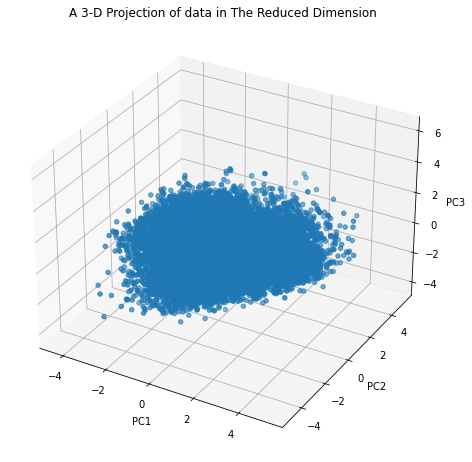

In [27]:
# Step III : A 3-D projection of dataset in the reduced dimension
x = PCA_ds["PC1"]
y = PCA_ds["PC2"]
z = PCA_ds["PC3"]

fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = 'viridis'
sc = ax.scatter(x, y, z)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'''A 3-D Projection of data in The Reduced Dimension''')

Text(0, 0.5, 'Explained Variance')

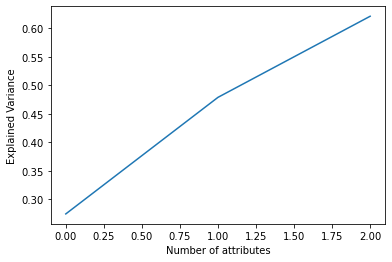

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of attributes')
plt.ylabel('Explained Variance')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4. Data Transformation by normalization</p>

### **Benifits :**
   + All attributes converted into equal weight avoiding dependence of measurement unit's choice
   + Scaled to fall within a smaller specified range
   + Make mining process more efficient and patterns found easier to understand

### Min-max normalization of the data

In [29]:
def Min_Max_Normalization(attribute,df,New_min,New_max):
    min_ = np.min(df[f'{attribute}'])
    max_ = np.max(df[f'{attribute}'])
    v = df[f'{attribute}']
    h = New_max - New_min
    min_maxN = ((v - min_) / (max_ - min_))*h + New_min
    return min_maxN

### Normalized Data

In [30]:
attributes = Data.keys()
New_min = 0
New_max = 1
dataset_N1 = Data.copy()
for i in range(len(attributes)):
    N = Min_Max_Normalization(attributes[i],Data,New_min,New_max)
    dataset_N1[attributes[i]] = N

In [31]:
dataset_N1

,SMAP_Latitude,SMAP_Longitude,ddm_snr,gps_tx_power_db_w,gps_ant_gain_db_i,SMAP_SP_RX_Gain,tx_to_sp_range,DDM_Peak,SMAP_SM
0,1.0,0.000000,0.570347,0.595406,0.523054,0.609430,0.400993,0.457172,0.378777
1,1.0,0.023810,0.497510,0.595855,0.676390,0.319629,0.545913,0.416611,0.466696
2,1.0,0.071428,0.178364,0.493334,0.576180,0.002931,0.565098,0.647497,0.554963
3,1.0,0.166667,0.536794,0.447934,0.456696,0.268931,0.462995,0.344496,0.722668
4,1.0,0.190476,0.622247,0.315159,0.565517,0.407192,0.554558,0.834504,0.735680
...,...,...,...,...,...,...,...,...,...
22089,0.0,0.738095,0.420345,0.500446,0.399566,0.488635,0.794515,0.390108,0.725347
22090,0.0,0.785714,0.568329,0.466151,0.370035,0.587207,0.514446,0.510064,0.817920
22091,0.0,0.809523,0.508467,0.414102,0.474165,0.564374,0.662038,0.403238,0.861455
22092,0.0,0.833333,0.538953,0.353712,0.525113,0.491717,0.770864,0.446753,0.832506


+ We will use the normalized data in the model building

<a id="1"></a>
## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. Splitting the Datasets into Validation and Training sets</p>

### Target Variable

In [32]:
Target_Variable = dataset_N1.iloc[:,-1]
Target_Variable

0        0.378777
1        0.466696
2        0.554963
3        0.722668
4        0.735680
           ...   
22089    0.725347
22090    0.817920
22091    0.861455
22092    0.832506
22093    0.823504
Name: SMAP_SM, Length: 22094, dtype: float64

### Features

In [33]:
Data_features = dataset_N1.iloc[:,:-1]
Data_features.keys()

Index(['SMAP_Latitude', 'SMAP_Longitude', 'ddm_snr', 'gps_tx_power_db_w',
       'gps_ant_gain_db_i', 'SMAP_SP_RX_Gain', 'tx_to_sp_range', 'DDM_Peak'],
      dtype='object')

### Splitting the dataset into the Training set and Test set

In [34]:
X_train,X_test,y_train,y_test = train_test_split(Data_features,Target_Variable,test_size=0.3,random_state=0)

In [35]:
X_train.shape

(15465, 8)

In [36]:
X_test.shape

(6629, 8)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">6. Building the Separate Models</p>

# 1. Decision Tree Prediction model

+ The algorithm works by dividing the entire dataset into a tree-like structure supported by some rules and conditions. 
+ Then it gives predictions based on those conditions. 
+ There is a high chance of overfitting in this model because of the greater depth of trees and greater number of splits or branches. 
+ It increases the variance of the model by increasing the training error 
+ Due to overfitting problem, the prediction on new data points is relatively poor.

## ----> Fully grown tree 

### Training the simple model 

In [37]:
DTR_Regressor = DecisionTreeRegressor()
DTR_Regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [38]:
X_train_predicted = DTR_Regressor.predict(X_train)

In [39]:
def Evaluation_of_Regressor(y_train, X_train_predicted):
    print('Accuracy :',100*np.round(r2_score(y_train, X_train_predicted),2),'%')
    print('Error Rate :',100-100*np.round(r2_score(y_train, X_train_predicted),2),'%')
    
    plt.figure(figsize=(20,4),dpi=100)
    plt.plot(y_train,y_train,label = 'Actual values of power',color='red') 
    plt.scatter(y_train,X_train_predicted,label = 'Predicted values of power')
    plt.legend()

### Evaluation of Regressor

Accuracy : 82.0 %
Error Rate : 18.0 %


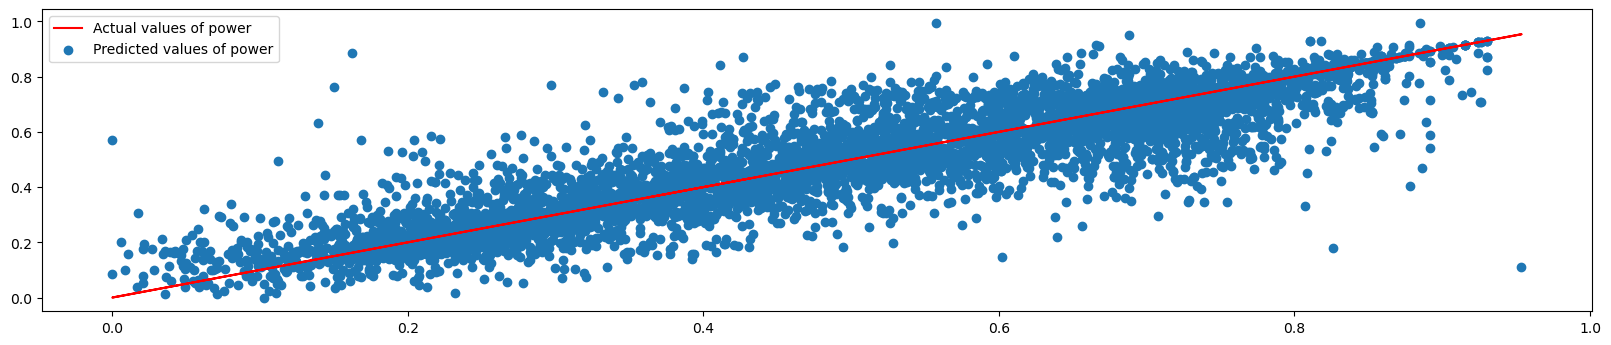

In [40]:
y_predt = DTR_Regressor.predict(X_test) 
Evaluation_of_Regressor(y_test, y_predt)

## ----> Model with Pruning :

+ Decision Tree pruning ensures trimming down a full tree to reduce the complexity and variance of the model. 
+ It fixes the problem of overfitting. 
+ It reduces the depth of the decision tree 

### *** Pre-pruning or forward pruning

+ We usually apply this technique before the construction of a decision tree
+ Stops the non-significant branches from generating
+ It uses terminating condition to stop splitting of some of the branches further 

### Hyperparameter tuning :
  - It can be used to find best fit values for parameters like:
     + max_depth
     + max_samples_leaf
     + max_samples_split etc

- As of now we will control these parameters
     - max_depth: maximum depth of decision tree
     - min_sample_split: The minimum number of samples required to split an internal node
     - min_samples_leaf: The minimum number of samples required to be at a leaf node

In [41]:
parameters = {'max_depth': [10000],
              'max_features': [10],
              'min_samples_leaf': [30],
              'min_samples_split': [20]
             }

Gscv = GridSearchCV(estimator=DTR_Regressor,
                    param_grid=parameters,
                    cv = 5,
                    n_jobs = -1, 
                    verbose = 2
                   )
Gscv.fit(X_train,y_train)
DTR_Regressor_PrePrunned = Gscv.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [42]:
DTR_Regressor_PrePrunned

DecisionTreeRegressor(max_depth=10000, max_features=10, min_samples_leaf=30,
                      min_samples_split=20)

#### After pre - prunning : Improved accuracy on test data

Accuracy : 86.0 %
Error Rate : 14.0 %


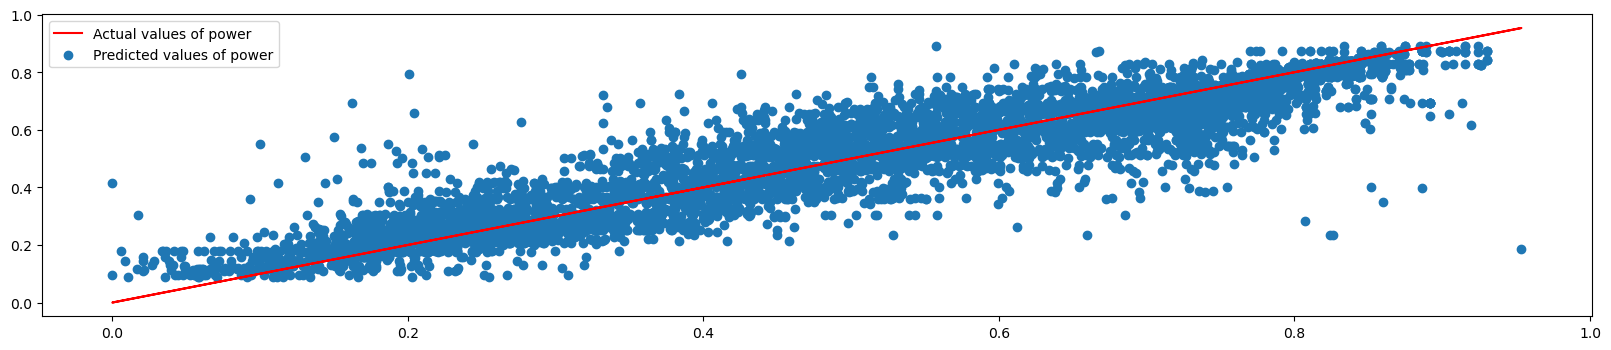

In [43]:
y_predt = DTR_Regressor_PrePrunned.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

## *** Post - prunning or backward pruning

+ It is the process where the decision tree is generated first and then the non-significant branches are removed. 
+ We use this technique after the construction of the decision tree. 
+ It is used when decision tree has very large or infinite depth and shows overfitting of the model. 

#### Cost complexity pruning technique : 
+ The cost complexity parameter, ccp_alpha parameterizes by giving minimum leaf value of decision tree 
+ Each ccp_alpha will create different classifiers and choose the best out of it
+ More number of nodes are pruned with greater values of ccp_alpha

+ Extracting ccp_alpha and impurities from classifier using function cost_complexity_pruning_path()

In [44]:
Path = DTR_Regressor.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = Path.ccp_alphas,Path.impurities
print('ccp_alphas:\n',ccp_alphas)
print('\n\nImpurities:\n',impurities)

ccp_alphas:
 [0.00000000e+00 3.58946985e-20 3.58946985e-20 ... 2.33285000e-03
 5.45067616e-03 1.83772810e-02]


Impurities:
 [0.00013771 0.00013771 0.00013771 ... 0.02470146 0.03015213 0.04852941]


In [45]:
ccp_alphas.shape

(10892,)

#### Trend between total impurity vs effective alpha for training set
+ The last value in ccp_alphas or the maximum effective alpha value is removed
+ Because it is the trivial tree with only one node.
+ Now we need to train a decision tree using the effective alphas.

Text(0.5, 1.0, 'Total impurity vs effective alpha for training set')

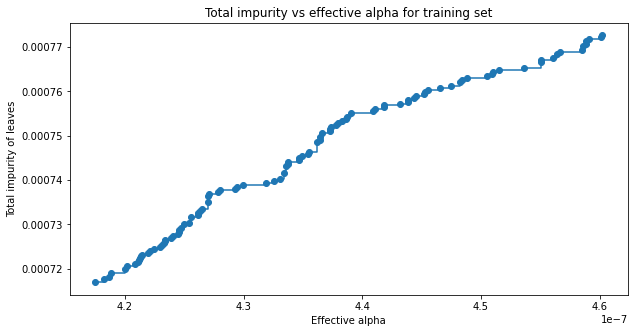

In [46]:
plt.figure(figsize=(10,5))
plt.plot(ccp_alphas[8800:8900], impurities[8800:8900], marker="o", drawstyle="steps-post")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total impurity vs effective alpha for training set")

+ We can see that as the value of the effective alpha increases total impurities in the leaves increases

#### Appending models corresponding to each alpha in a list

In [47]:
Regressors = []
for ccp_alpha in ccp_alphas[8800:8900]:
    Regressor = DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
    Regressor.fit(X_train,y_train)
    Regressors.append(Regressor)

In [48]:
Regressors

[DecisionTreeRegressor(ccp_alpha=4.174864858445428e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.182181227947892e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.186824890526379e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.188541428908053e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.199821232135846e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.201618594935585e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.208893058040255e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.211266020687018e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.2118047948274897e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.2125570653001174e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.213710380388195e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.2148089024083014e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.2190802850890734e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.221090145521

#### Trend between depth of the tree and the ccp_alpha

Text(0.5, 1.0, 'Depth vs alpha')

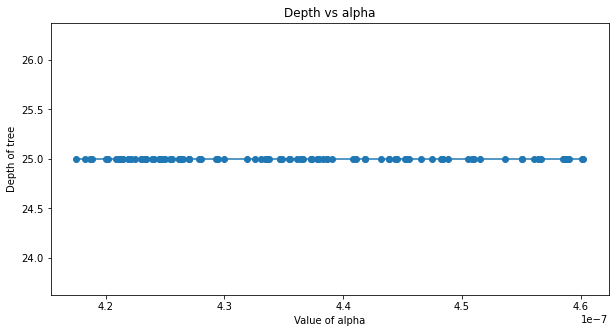

In [49]:
depth = [Regressor.tree_.max_depth for Regressor in Regressors[:]]

plt.figure(figsize=(10,5))
plt.plot(ccp_alphas[8800:8900], depth, marker="o", drawstyle="steps-post")
plt.xlabel("Value of alpha")
plt.ylabel("Depth of tree")
plt.title("Depth vs alpha")

+ We can see as the value of alpha increases the depth of tree decreases

#### Trend between number of nodes of the tree and the ccp_alpha

Text(0.5, 1.0, 'Number of nodes vs alpha')

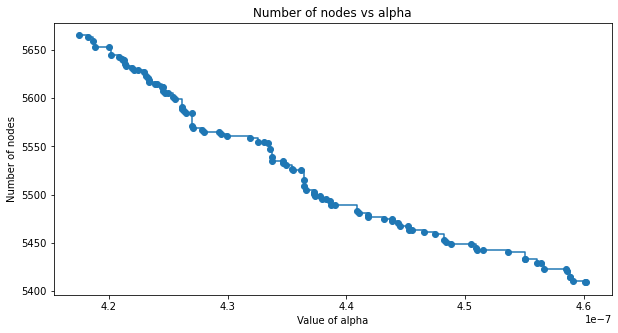

In [50]:
node_counts = [Regressor.tree_.node_count for Regressor in Regressors[:]]

plt.figure(figsize=(10,5))
plt.plot(ccp_alphas[8800:8900], node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("Value of alpha")
plt.ylabel("Number of nodes")
plt.title("Number of nodes vs alpha")

+ As the value of alpha increases the number of nodes decreases as the depth of tree also decreases

In [51]:
train_accuracy = []
test_accuracy = []
for c in Regressors:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_accuracy.append(r2_score(y_train, y_train_pred))
    test_accuracy.append(r2_score(y_test, y_test_pred))

Text(0.5, 1.0, 'Accuarcy vs alpha')

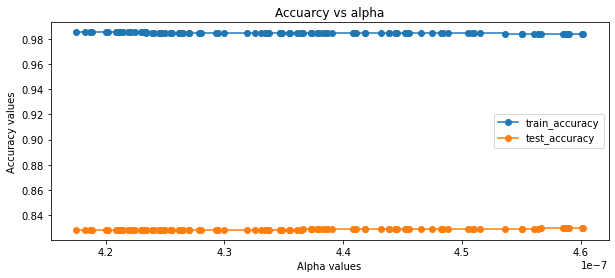

In [52]:
plt.figure(figsize=(10,4))
plt.plot(ccp_alphas[8800:8900],train_accuracy,label = 'train_accuracy',marker="o",drawstyle='steps-post')
plt.plot(ccp_alphas[8800:8900],test_accuracy,label = 'test_accuracy',marker="o",drawstyle='steps-post')
plt.xlabel('Alpha values')
plt.ylabel('Accuracy values')
plt.legend()
plt.title('Accuarcy vs alpha')

#### Training the model using the best ccp_alpha value

In [53]:
DTR_final = DecisionTreeRegressor(max_depth=10000, 
                                  max_features=10, 
                                  min_samples_leaf=30,
                                  min_samples_split=20,
                                  random_state=0,
                                  ccp_alpha=0)
DTR_final.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0, max_depth=10000, max_features=10,
                      min_samples_leaf=30, min_samples_split=20,
                      random_state=0)

Accuracy : 86.0 %
Error Rate : 14.0 %


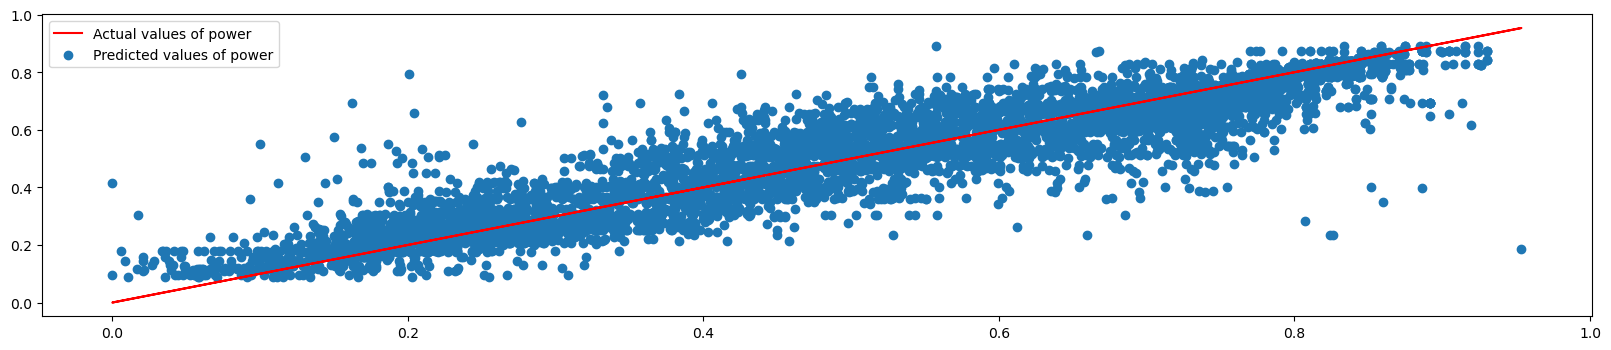

In [54]:
y_predt = DTR_final.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

+ Since accuracy on training sets data is 90% and on the test set data is 85% so it's good model can't be considered as the overfitted model.

# 2. The Random Forest Classification

In [55]:
RF_Model = RandomForestRegressor()

In [56]:
RF_Model.fit(X_train,y_train)

RandomForestRegressor()

### Importance of the features selected randomly by the random forest

Text(0.5, 1.0, 'Importance of the features selected randomly by the random forest')

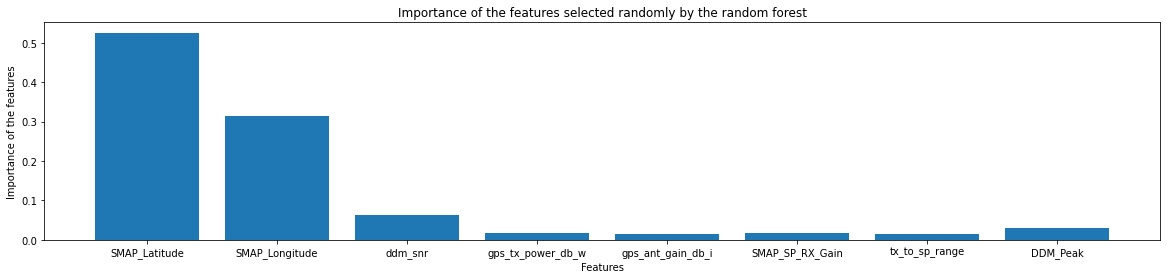

In [116]:
plt.figure(figsize=(20,4))
plt.bar(X_test.keys(),RF_Model.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importance of the features")
plt.title("Importance of the features selected randomly by the random forest")

Accuracy : 90.0 %
Error Rate : 10.0 %


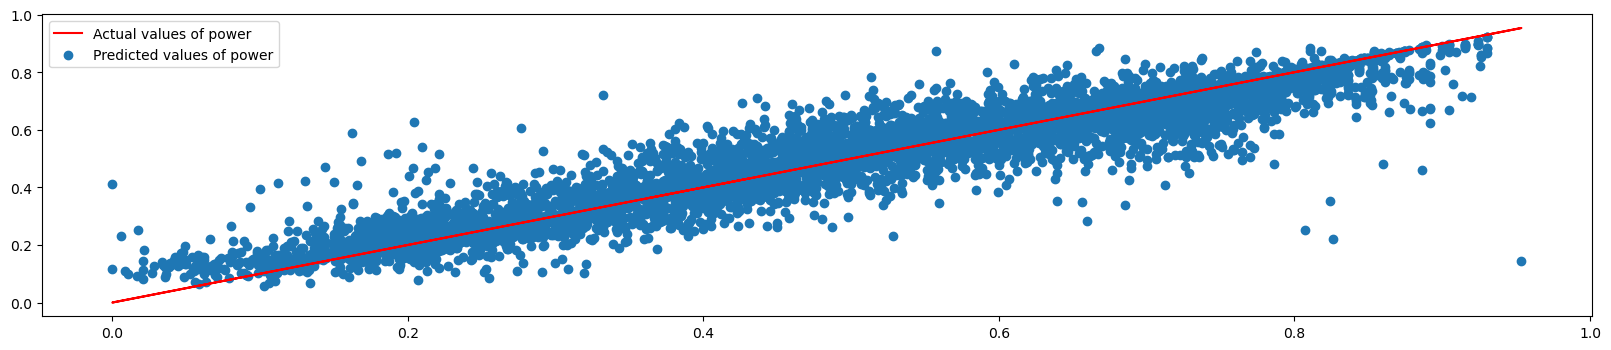

In [57]:
y_predt = RF_Model.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

## Tunning hyperparameter with the GridSearchCV 

In [58]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10000],
    'max_features': [10],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [700]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search_RF = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 2)

In [59]:
grid_search_RF.fit(X_train, y_train)
grid_search_RF.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'bootstrap': True,
 'max_depth': 10000,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 700}

Accuracy : 90.0 %
Error Rate : 10.0 %


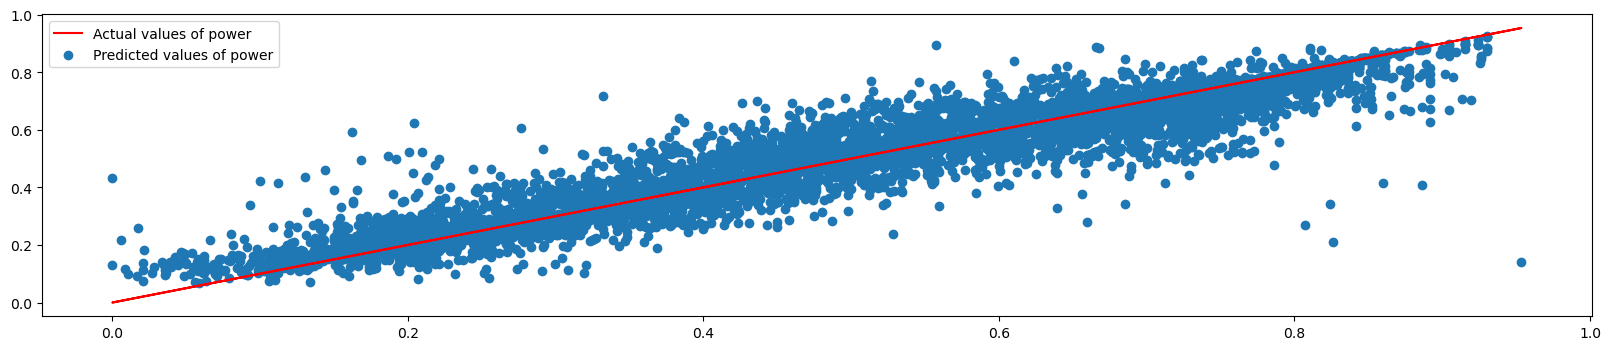

In [60]:
y_predt = grid_search_RF.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

## Tunning hyperparameter with the RandomizedSearchCV 

In [61]:
n_estimators = [700]
max_features = ['auto','sqrt']
max_depth = [10000]
min_samples_split = [2]
min_samples_leaf  = [2]
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10000],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [2],
 'n_estimators': [700]}


In [62]:
RF_Hyper = RandomForestRegressor()                  # Create the base model to tune

RF_Hyperp = RandomizedSearchCV(estimator = RF_Hyper, 
                               param_distributions = random_grid, 
                               n_iter = 10,    # search across 10 different combinations, and use all available cores
                               cv = 3,         # Random search of parameters, using 3 fold cross validation
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
RF_Hyperp.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10000],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [2],
                                        'n_estimators': [700]},
                   random_state=42, verbose=2)

In [63]:
RF_Hyperp.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10000,
 'bootstrap': True}

Accuracy : 90.0 %
Error Rate : 10.0 %


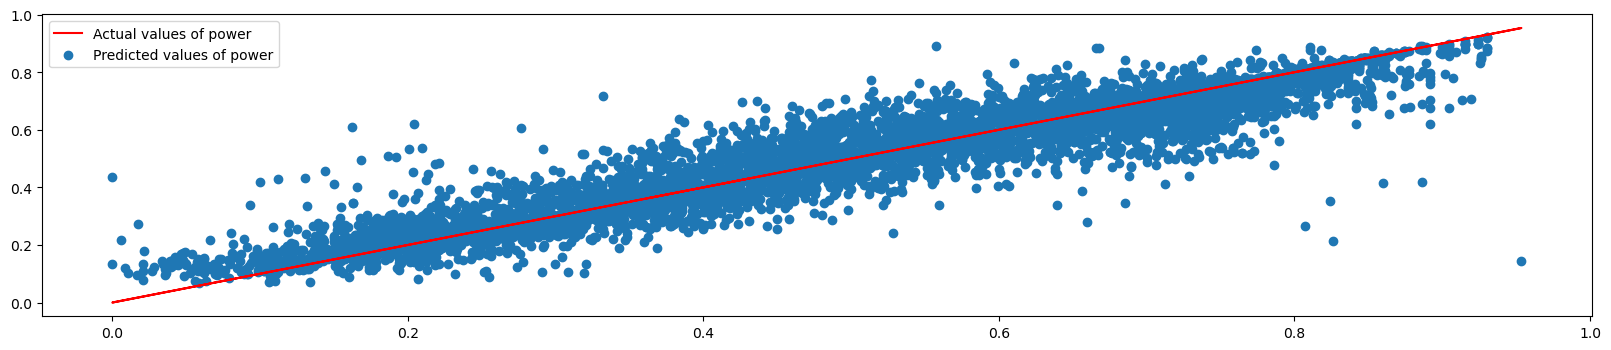

In [64]:
y_predt = RF_Hyperp.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

# 3. The Kernel Support Vector Regression Model

In [65]:
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(X_train,y_train)

SVR()

### Default Parameters

In [66]:
model_svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

+ **The default value of the parameter gamma is 'scale', i.e. gamma = 1 / (n_features * X.var()).**

Accuracy : 77.0 %
Error Rate : 23.0 %


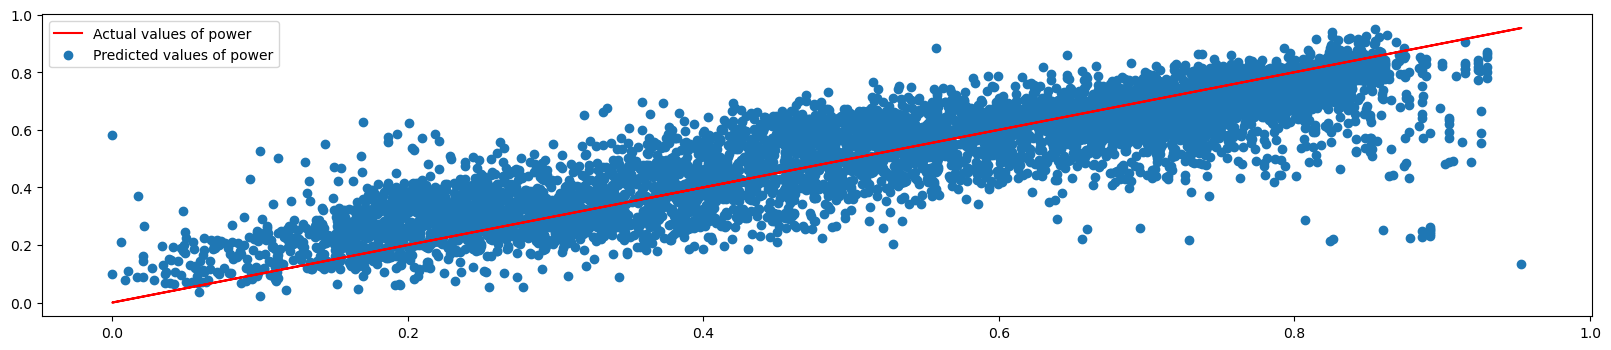

In [67]:
y_predt = model_svm.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

## ----> Hyperparameter tuning

+ The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
+ For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
+ A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
+ In other words C behaves as a regularization parameter in the SVM.

In [68]:
svm1 = SVR()
param_grid = {'C': [10],
              'degree': [6],
              'epsilon':[0.01],
              'kernel': ['rbf']}
model_svm_hyper = GridSearchCV(svm1,
                               param_grid,
                               cv = 2,
                               n_jobs = -1, 
                               verbose = 2
                              )
model_svm_hyper.fit(X_train,y_train)
model_svm_hyper.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


{'C': 10, 'degree': 6, 'epsilon': 0.01, 'kernel': 'rbf'}

In [69]:
model_svm_hyper.best_estimator_.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 6,
 'epsilon': 0.01,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Accuracy : 79.0 %
Error Rate : 21.0 %


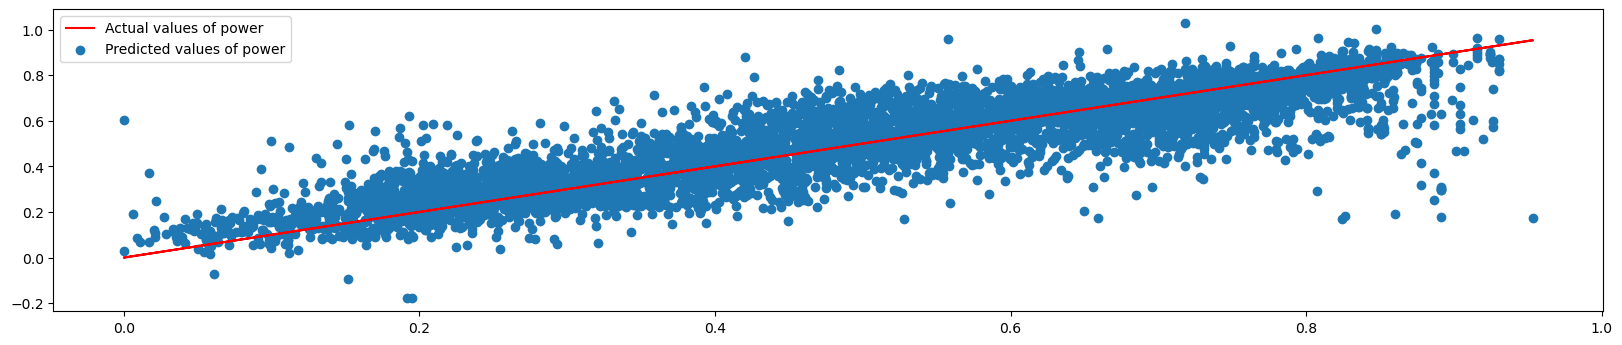

In [70]:
y_predt = model_svm_hyper.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">7. Ensemble Technique </p>
+ To boost the model accuracy
+ It helps improve results by combining several models to improve predictive performance compared to a single model 

# 1. Max Voting Regression

+ The idea is instead of creating separate dedicated models and finding the accuracy for each them
+ we create a single model which trains by these models and predicts output based on their combined majority of voting for each target value.

#### Ensemble of Models 

In [71]:
estimator = [] 
estimator.append(('Decision Tree  Regressor', DTR_Regressor)) 
estimator.append(('Decision Tree  Regressor Hyperparameter tunned',DTR_Regressor_PrePrunned))
estimator.append(('Decision Tree  Regressor Post pruning',DTR_final))

estimator.append(('Random Forest Regressor', RF_Model)) 
estimator.append(('Random Forest Regressor Grid Search', grid_search_RF)) 
estimator.append(('Random Forest Regressor Randomized search', RF_Hyperp)) 

estimator.append(('SVM Regressor', model_svm))
estimator.append(('SVM Regressor Hyper parameter tunned', model_svm_hyper))
estimator

[('Decision Tree  Regressor', DecisionTreeRegressor()),
 ('Decision Tree  Regressor Hyperparameter tunned',
  DecisionTreeRegressor(max_depth=10000, max_features=10, min_samples_leaf=30,
                        min_samples_split=20)),
 ('Decision Tree  Regressor Post pruning',
  DecisionTreeRegressor(ccp_alpha=0, max_depth=10000, max_features=10,
                        min_samples_leaf=30, min_samples_split=20,
                        random_state=0)),
 ('Random Forest Regressor', RandomForestRegressor()),
 ('Random Forest Regressor Grid Search',
  GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
               param_grid={'bootstrap': [True], 'max_depth': [10000],
                           'max_features': [10], 'min_samples_leaf': [2],
                           'min_samples_split': [2], 'n_estimators': [700]},
               verbose=2)),
 ('Random Forest Regressor Randomized search',
  RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
          

In [72]:
Max_voting = VotingRegressor(estimators = estimator) 
Max_voting.fit(X_train, y_train)  

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


VotingRegressor(estimators=[('Decision Tree  Regressor',
                             DecisionTreeRegressor()),
                            ('Decision Tree  Regressor Hyperparameter tunned',
                             DecisionTreeRegressor(max_depth=10000,
                                                   max_features=10,
                                                   min_samples_leaf=30,
                                                   min_samples_split=20)),
                            ('Decision Tree  Regressor Post pruning',
                             DecisionTreeRegressor(ccp_alpha=0, max_depth=10000,
                                                   max_features=10,
                                                   min_samples_leaf=30,
                                                   min_samp...
                                                param_distributions={'bootstrap': [True],
                                                                     'max_depth': [10000],
                                                                     'max_features': ['auto',
                                                                                      'sqrt'],
                                                                     'min_samples_leaf': [2],
                                                                     'min_samples_split': [2],
                                                                     'n_estimators': [700]},
                                                random_state=42, verbose=2)),
                            ('SVM Regressor', SVR()),
                            ('SVM Regressor Hyper parameter tunned',
                             GridSearchCV(cv=2, estimator=SVR(), n_jobs=-1,
                                          param_grid={'C': [10], 'degree': [6],
                                                      'epsilon': [0.01],
                                                      'kernel': ['rbf']},
                                          verbose=2))])

Accuracy : 89.0 %
Error Rate : 11.0 %


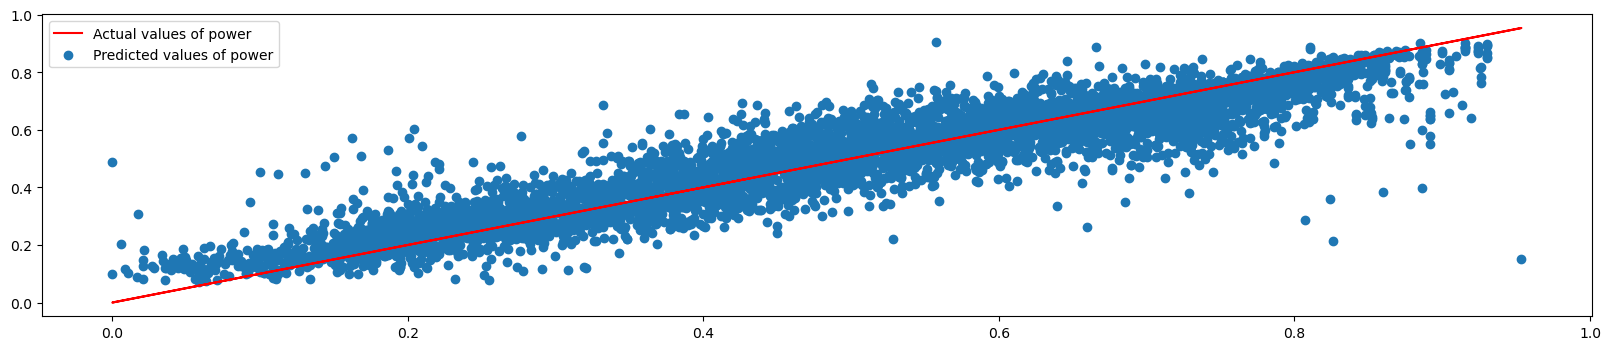

In [73]:
y_predt = Max_voting.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

# 2. Averaging Regression Model

+ Multiple predictions are made for each data point in averaging. 
+ Averaging can be used for while calculating target values for prediction problems.

### RMSE

In [74]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

In [75]:
models = [DTR_Regressor,DTR_Regressor_PrePrunned,DTR_final,
          RF_Model, grid_search_RF, RF_Hyperp, 
          model_svm, model_svm_hyper]

names  = ['Decision Tree  Regressor','Decision Tree  Regressor Hyperparameter tunned',
          'Decision Tree  Regressor Post pruning','Random Forest Regressor',
          'Random Forest Regressor Grid Search',
          'Random Forest Regressor Randomized search',
          'SVM Regressor','SVM Regressor Hyper parameter tunned']

In [76]:
for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}: \nMean of RMSE on 5 folds: {:.6f}, STD RMSE on 5 folds: {:4f}\n".format(name,score.mean(),score.std()))

Decision Tree  Regressor: 
Mean of RMSE on 5 folds: 0.098436, STD RMSE on 5 folds: 0.001657

Decision Tree  Regressor Hyperparameter tunned: 
Mean of RMSE on 5 folds: 0.086994, STD RMSE on 5 folds: 0.004522

Decision Tree  Regressor Post pruning: 
Mean of RMSE on 5 folds: 0.086994, STD RMSE on 5 folds: 0.004522

Random Forest Regressor: 
Mean of RMSE on 5 folds: 0.071384, STD RMSE on 5 folds: 0.002340

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Random Forest Regressor Grid Search: 
Mean of RMSE on 5 folds: 0.070648, STD RMSE on 5 folds: 0.002188

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds fo

### Defining the weight

In [77]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,model,weight):
        self.model = model
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.model]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        
        # For every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [78]:
# Assign weights to all the above 8 models
w1 = 0.12
w2 = 0.32
w3 = 0.12
w4 = 0.32
w5 = 0.12
w6 = 0.12
w7 = 0.32
w8 = 0.12

Models     = [DTR_Regressor,
              DTR_Regressor_PrePrunned,
              DTR_final,
              RF_Model,
              grid_search_RF,
              RF_Hyperp, 
              model_svm, 
              model_svm_hyper]

Weights    = [w1,w2,w3,w4,w5,w6,w7,w8]

weight_avg = AverageWeight(model = Models, weight = Weights)         
score      = rmse_cv(weight_avg,X_train,y_train)
print(f'''Mean of RMSE on averaged target values of all the models : {score.mean()}
\n STD of RMSE on averaged target values of all the models : {score.std()}''')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Mean of RMSE on averaged target values of all the models : 0.3245966296421422

 STD of RMSE on averaged target valu

# 3. Stacking Regression Models
+ Stacking, also known as Stacked Generalization is an ensemble technique that combines multiple regression models via a meta-regressor. 
+ The base-level models are trained on a complete training set, then the meta-model is trained on the features that are outputs of the base-level model. 
+ The base-level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.

+ Step 1: Suppose the train set is split into 10 parts.
+ Step 2: A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.
+ Step 3: The base model (in this case, decision tree) is then fitted on the whole train dataset.
+ Step 4: Using this model, predictions are made on the test set.
+ Step 5: Steps 2 to 4 are repeated for another base model (say NB) resulting in another set of predictions for the train set and test set.
+ Step 6: The predictions from the train set are used as features to build a new model.
+ Step 7: This model is used to make final predictions on the test prediction set.

In [79]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        from sklearn.model_selection import KFold
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [80]:
X_train_imputed = SimpleImputer().fit_transform(X_train)
y_train_imputed = SimpleImputer().fit_transform((np.array(y_train)).reshape(-1,1)).ravel()

In [81]:
stack_model = stacking(mod = Models,meta_model = RF_Model)
score = rmse_cv(stack_model,X_train_imputed,y_train_imputed)
print(f'''Mean of RMSE on averaged target values of all the models : {score.mean()}
\n STD of RMSE on averaged target values of all the models : {score.std()}''')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

# 4. Bagging Regression Models
+ Bagging is shorthand for the combination of bootstrapping and aggregating. 
+ Bootstrapping is a method to help decrease the variance of the Regressor and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. 
+ Bagging is an effective method when limited data, and by using samples able to get an estimate by aggregating the scores over many samples.

+ Once the bagging is done, and all the models have been created on (mostly) different data, a weighted average is then used to determine the final score.
+ Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.
#### Steps:
  - Step 1: Multiple subsets are created from the original dataset, selecting observations with replacement.
  - Step 2: A base model (weak model) is created on each of these subsets.
  - Step 3: The models run in parallel and are independent of each other.
  - Step 4: The final predictions are determined by combining the predictions from all the models.

In [103]:
# Regressor_array = Models
# for Regressor in Regressor_array:
#     vanilla_scores = cross_val_score(Regressor,
#                                      Data_features,
#                                      Target_Variable,
#                                      cv=10, 
#                                      n_jobs=-1)
    
#     bagging_Regressor    = BaggingRegressor(Regressor,
#                                              max_samples=2,
#                                              max_features=11, 
#                                              random_state=0)
    
#     bagging_scores = cross_val_score(bagging_Regressor,
#                                      Data_features,
#                                      Target_Variable, 
#                                      cv=10,n_jobs=-1)
    
#     print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(Regressor.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
#     print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(Regressor.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

# 5. Boosting Accuracy combining Regression Models
+ The main idea of boosting is to add additional models to the overall ensemble model sequentially. 
+ Previously with bagging, we averaged each individual model created. 
+ This time with each iteration of boosting, a new model is created and the new base-learner model is trained (updated) from the errors of the previous learners.
+ The gradient descent optimization occurs on the output of the varies models, and not their individual parameters.
+ Each new subset which is iterated upon contains elements which could have been wrong predicted by previous models. 
+ AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. 
+ Multiple sequential models are created, each correcting the errors from the last model. 
+ AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

### Steps :
* Initially, all observations in the dataset are given equal weights.
* A model is built on a subset of data.
* Using this model, predictions are made on the whole dataset.
* Errors are calculated by comparing the predictions and actual values.
* While creating the next model, higher weights are given to the data points which were predicted incorrectly.
* Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
* This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

In [84]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor,GradientBoostingRegressor

# ----> Adda Boost

### Hyper Parameter Tuning

In [85]:
L = np.linspace(0.01,1,100)
Acc = []
for i in range(len(L)):
    l = L[i]
    Grad_boost = AdaBoostRegressor(learning_rate=l)
    Grad_boost.fit(X_train, y_train)
    y_predt = Grad_boost.predict(X_test)
    Accuracy = 100*np.round(r2_score(y_test, y_predt),2)
    Acc.append(Accuracy)

Text(0.5, 1.0, 'Trade off between the accuracy and the learning rate')

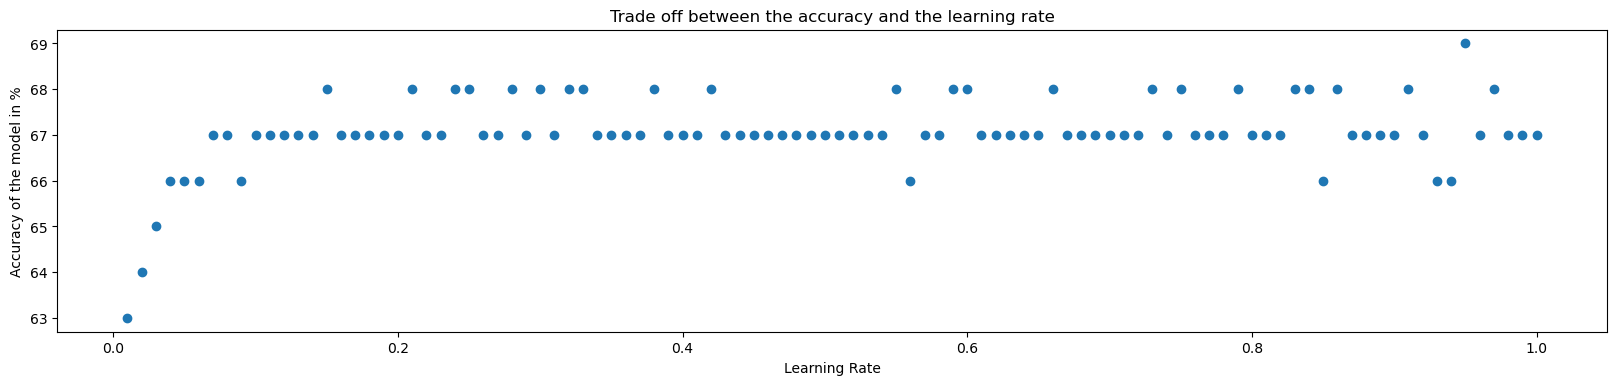

In [86]:
plt.figure(figsize=(20,4),dpi=100)
plt.scatter(L[:],Acc[:])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy of the model in %')
plt.title('Trade off between the accuracy and the learning rate')

### Finding best Learning Rate

In [87]:
def Best_Learning_Rate(L,Acc):
    for i in range(len(L)):
        acc = Acc[i]
        max1 = np.max(Acc)
        if acc==max1:
            lbest = L[i]
    return lbest

In [88]:
ada_boost = AdaBoostRegressor(learning_rate=Best_Learning_Rate(L,Acc))
ada_boost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.9500000000000001)

Accuracy : 68.0 %
Error Rate : 32.0 %


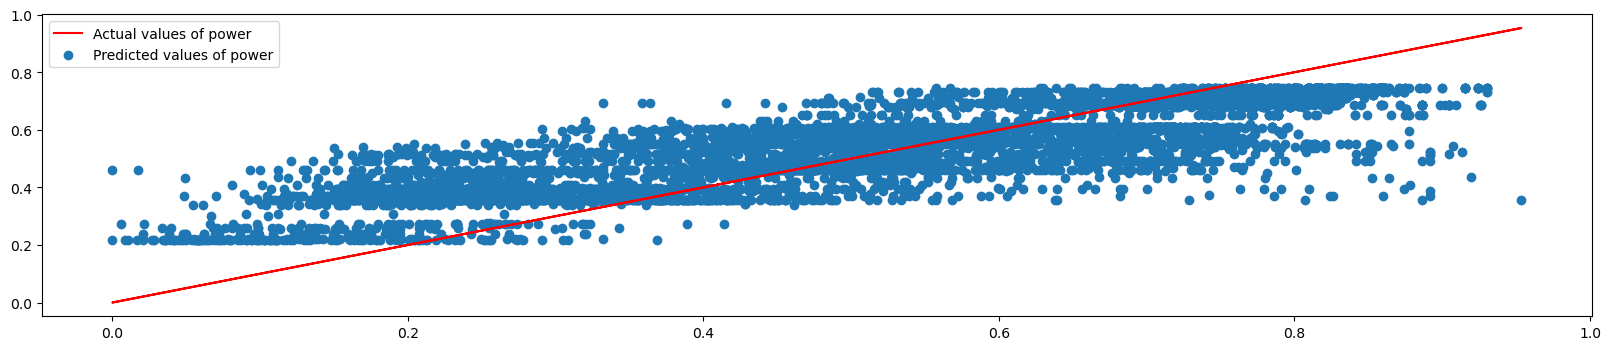

In [89]:
y_predt = ada_boost.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

# ----> Gradient Boosting   
+ It uses the boosting technique, combining a number of weak learners to form a strong learner. 
+ Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

In [90]:
grad_boost = GradientBoostingRegressor()
grad_boost.fit(X_train, y_train)

GradientBoostingRegressor()

Accuracy : 77.0 %
Error Rate : 23.0 %


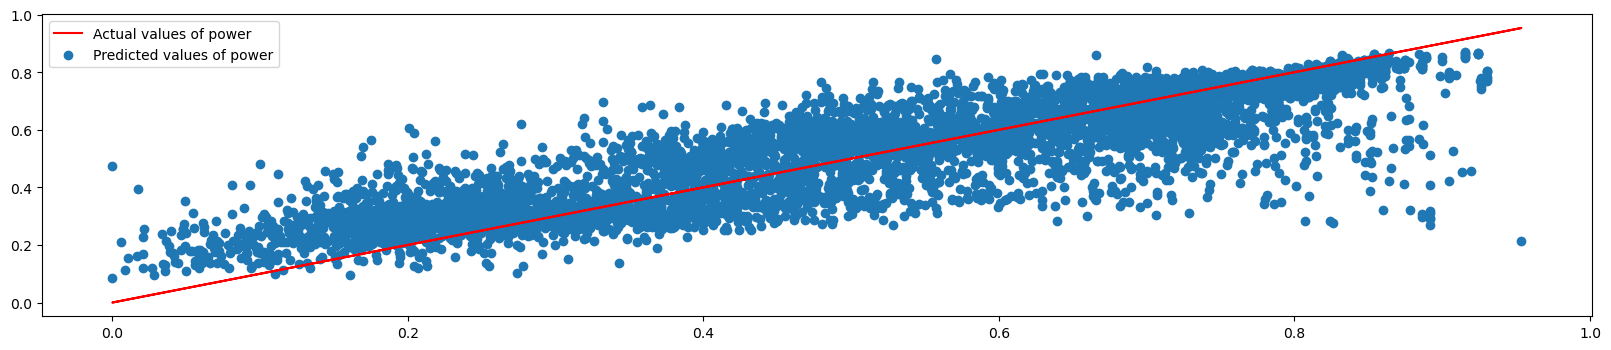

In [91]:
y_predt = grad_boost.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

### Hyper Parameter Tuning

In [92]:
L = np.linspace(0.01,1,100)
Acc = []
for i in range(len(L)):
    l = L[i]
    Grad_boost = GradientBoostingRegressor(learning_rate=l)
    Grad_boost.fit(X_train, y_train)
    y_predt = Grad_boost.predict(X_test)
    Accuracy = 100*np.round(r2_score(y_test, y_predt),2)
    Acc.append(Accuracy)

Text(0.5, 1.0, 'Trade off between the accuracy and the learning rate')

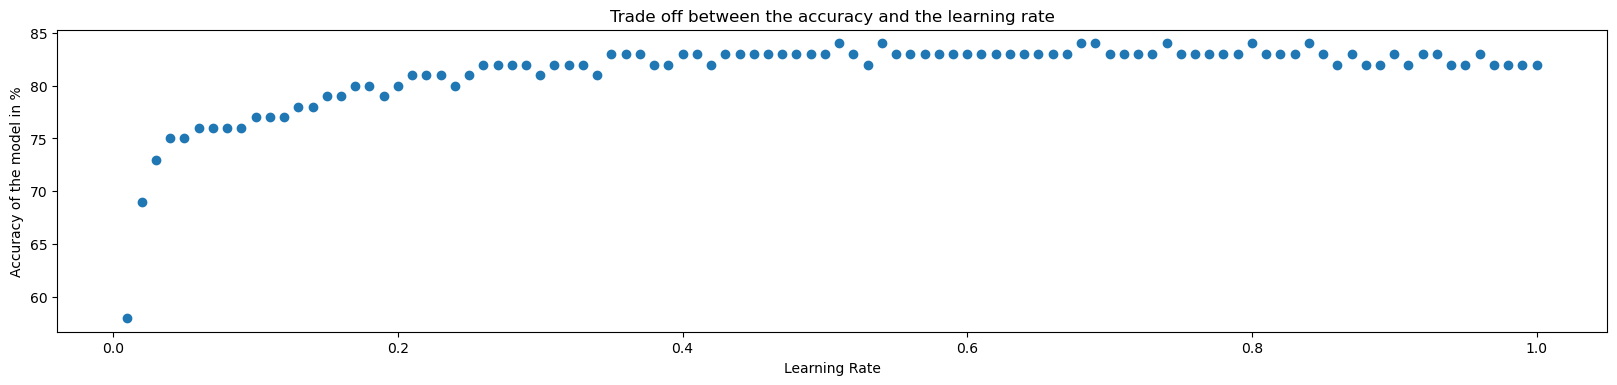

In [93]:
plt.figure(figsize=(20,4),dpi=100)
plt.scatter(L,Acc)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy of the model in %')
plt.title('Trade off between the accuracy and the learning rate')

In [94]:
grad_boost = GradientBoostingRegressor(learning_rate = Best_Learning_Rate(L,Acc))
grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.8400000000000001)

Accuracy : 84.0 %
Error Rate : 16.0 %


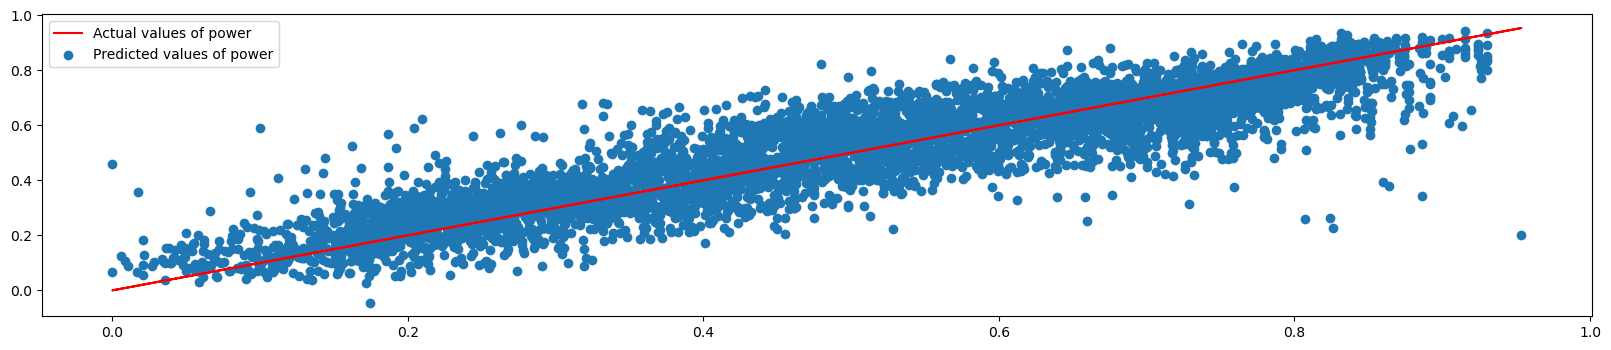

In [95]:
y_predt = grad_boost.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

# ----> XG Boost
+ XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. 
+ It has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. 
+ XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. 
+ It also includes a variety of regularization which reduces overfitting and improves overall performance. 
+ Hence it is also known as regularized boosting technique.

### Parameters :
+ min_samples_split :
  * Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
  * Used to control over-fitting. 
  * Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
 
+ min_samples_leaf :
  * Defines the minimum samples required in a terminal or leaf node.
  * Generally, lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in the majority will be very small.
+ min_weight_fraction_leaf :
  * Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
+ max_depth :
  * The maximum depth of a tree.
  * Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
  * Should be tuned using CV.
+ max_leaf_nodes :
  * The maximum number of terminal nodes or leaves in a tree.
  * Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
  * If this is defined, GBM will ignore max_depth.

+ max_features :
  * The number of features to consider while searching for the best split. These will be randomly selected.
  * As a thumb-rule, the square root of the total number of features works great but we should check up to 30-40% of the total number of features.
  * Higher values can lead to over-fitting but it generally depends on a case to case scenario.

### Hyper Parameter Tuning

In [96]:
L = np.linspace(0,1,100)
Acc = []
for i in range(len(L)):
    l = L[i]
    xgb_boost = xgb.XGBRegressor(learning_rate=l)
    xgb_boost.fit(X_train, y_train)
    y_predt = xgb_boost.predict(X_test)
    Accuracy = 100*np.round(r2_score(y_test, y_predt),2)
    Acc.append(Accuracy)

Text(0.5, 1.0, 'Trade off between the accuracy and the learning rate')

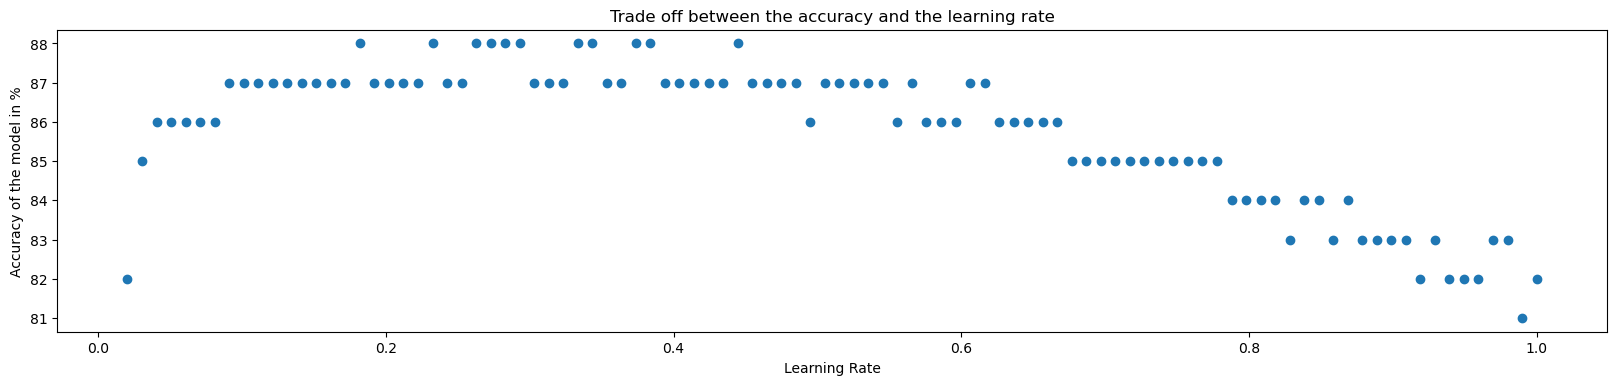

In [97]:
plt.figure(figsize=(20,4),dpi=100)
plt.scatter(L[2:],Acc[2:])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy of the model in %')
plt.title('Trade off between the accuracy and the learning rate')

In [98]:
Best_Learning_Rate(L,Acc)

0.4444444444444445

In [99]:
Acc1 = []
B = np.linspace(0,10,100)
for i in range(len(L)):
    b = B[i]
    xgb_boost = xgb.XGBRegressor(base_score=b,learning_rate=Best_Learning_Rate(L,Acc))
    xgb_boost.fit(X_train, y_train)
    y_predt = xgb_boost.predict(X_test)
    Accuracy = 100*np.round(r2_score(y_test, y_predt),2)
    Acc1.append(Accuracy)

Text(0.5, 1.0, 'Trade off between the accuracy and the learning rate')

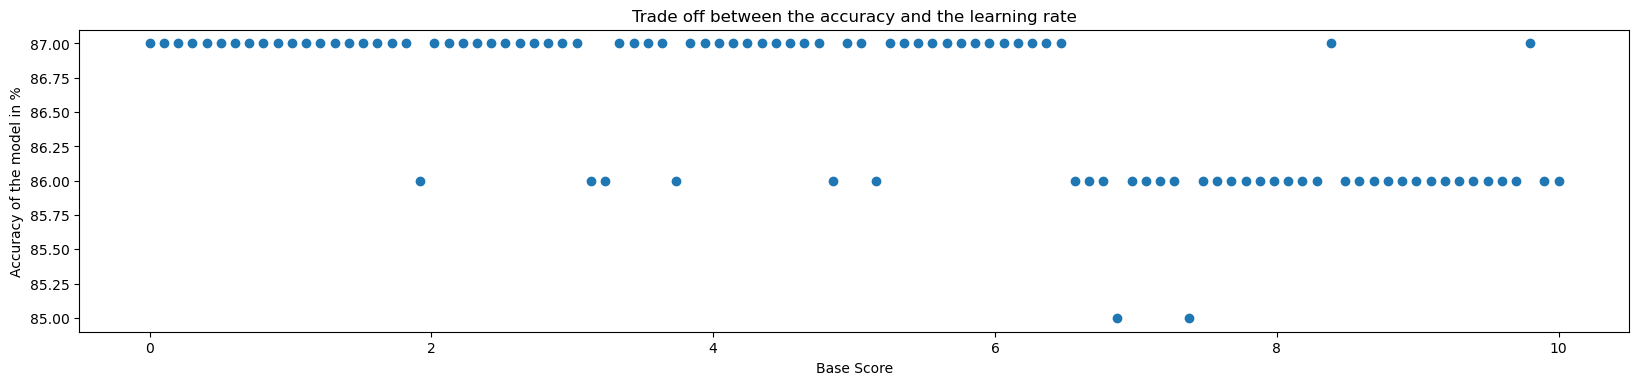

In [100]:
plt.figure(figsize=(20,4),dpi=100)
plt.scatter(B,Acc1)
plt.xlabel('Base Score')
plt.ylabel('Accuracy of the model in %')
plt.title('Trade off between the accuracy and the learning rate')

Accuracy : 88.0 %
Error Rate : 12.0 %


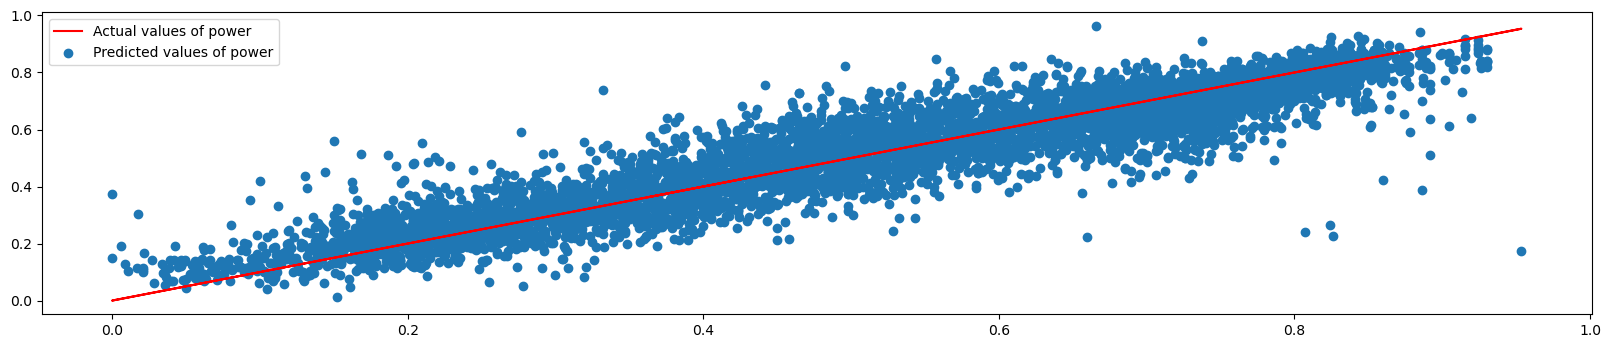

In [101]:
xgb_boost = xgb.XGBRegressor(base_score=0.5,learning_rate=Best_Learning_Rate(L,Acc))
xgb_boost.fit(X_train, y_train)
y_predt = xgb_boost.predict(X_test)
Evaluation_of_Regressor(y_test, y_predt)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> The End </p>